# Part 2.1: Prediction of the Water Quality Index using Supervised Learning Regression algorithms

#### Objective

The objective is to try to predict the Water Quality Index using the fewest possible parameters and the easiest to use and obtain. We have used the 9 cation / ion measurements to calculate the WQI, therefore the idea is to use far fewer parameters to predict it.

#### Imports

In [8]:
# Pandas and numpy for data manipulation
import pandas as pd
import numpy as np
# No warnings about setting value on copy of slice
pd.options.mode.chained_assignment = None
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
# Matplotlib for visualization
import matplotlib.pyplot as plt
%matplotlib inline
# Seaborn for visualization
import seaborn as sns
sns.set(font_scale = 2)
# Set default font size
plt.rcParams['font.size'] = 24
from IPython.core.pylabtools import figsize
# Separate the data:
from sklearn.model_selection import train_test_split
# scaling values
from sklearn.preprocessing import MinMaxScaler
# Machine Learning Models
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
# Hyperparameter tuning
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
#warnings
import warnings
warnings.filterwarnings("ignore")

#### Upload the file

Use file created on notebook 00_Cleaning_manipulation_and_unification.ipynb:

In [9]:
chemical_stations=pd.read_excel("chemical_WQI_ICI_stations.xlsx")
chemical_stations.head()

,POINT ID,DATE,River/Lake/Dam,Locality Description of Sample Station,Latitude (degrees),Longitude (degrees),Subdrainage Region,Drainage Region,YEAR,EC (μS/cm),PH,TDS (mg/L),Na (mg/L),Mg (mg/L),Ca (mg/L),F (mg/L),Cl (mg/L),NO2+NO3 (mg/L),SO4 (mg/L),PO4 (mg/L),TAL (CaCO3) (mg/L),Si (mg/L),K (mg/L),NH4 (mg/L),2[SO4],[Cl],SAR,HCO3 (mg/L),WQI,Class WQI,ICI (%),Class ICI,Class SAR
0,90160,1976-04-20,RIVER,PIENAARS RIVER AT KLIPDRIFT,-25.3806,28.3167,A23,A,1976,366.0,7.83,267.0,24.1,18.2,22.0,0.57,19.7,0.04,19.6,0.014,130.7,4.33,3.47,0.01,11.404165,15.514532,0.919854,158.380632,33.716337,Excellent,27.074050,Rock dominance,Very good water quality
1,90160,1976-04-27,RIVER,PIENAARS RIVER AT KLIPDRIFT,-25.3806,28.3167,A23,A,1976,380.0,7.78,280.0,25.6,19.2,22.8,0.57,19.0,0.04,20.4,0.004,138.3,4.06,3.54,0.02,11.395173,14.365124,0.954883,167.712993,34.836136,Excellent,25.891041,Rock dominance,Very good water quality
2,90160,1976-05-18,RIVER,PIENAARS RIVER AT KLIPDRIFT,-25.3806,28.3167,A23,A,1976,372.0,7.48,269.0,22.8,17.2,23.9,0.44,18.8,0.29,17.9,0.007,134.3,5.59,2.91,0.08,10.382320,14.759249,0.868154,163.351497,31.462083,Excellent,25.300708,Rock dominance,Very good water quality
3,90160,1976-05-25,RIVER,PIENAARS RIVER AT KLIPDRIFT,-25.3806,28.3167,A23,A,1976,367.0,7.43,269.0,22.9,17.9,23.8,0.48,19.4,0.39,18.1,0.004,132.7,5.46,3.03,0.08,10.530419,15.276851,0.863294,161.458381,32.372463,Excellent,25.991911,Rock dominance,Very good water quality
4,90160,1976-06-01,RIVER,PIENAARS RIVER AT KLIPDRIFT,-25.3806,28.3167,A23,A,1976,383.0,7.34,279.0,24.3,18.5,24.5,0.53,19.9,0.56,18.1,0.007,137.6,5.13,3.03,0.10,10.210491,15.194491,0.901894,167.504656,34.027075,Excellent,25.633347,Rock dominance,Very good water quality


### Possible Predictive Variables
To calculate the WQI we have used a series of parameters from our dataset that obviously we cannot use for prediction. Therefore, we have a series of numerical and categorical variables that we can use and which are:
#### Numerical variables
- Electrical conductivity (EC (μS / cm))
- PH
- Sulfate (SO4 (mg / L))
- Phosphate (PO4 (mg / L))
- CaCO3 (mg / L)
- Silicon (Si (mg / L))
- NH4 (mg / L)
- Latitude (degrees)
- Longitude (degrees)

#### Categorical variables
- Drainage Region
- Subdrainage Region
- POINT ID
- Class ICI

## Treatment of  variables

We have different variables that represent the positions of the measurement points of rivers, lakes and reservoirs. The location of the measurement points may have an influence on the WQI, but it does not make sense to use more than one variable to represent the positions, since they would provide redundant information.

Let's see the density graphs colored by the value of the variable in question. They can be considered as smoothed histograms, as they show the distribution of a single variable. If we color the density curves by a variable, this will show us how the distribution changes as a function of position.

In order not to saturate the graphs, we will limit the graph to sample types that have more than "x" measures:

### 1) Position variables

#### Variable: Region (Categorical variable)

In [3]:
print("There are",len(chemical_stations["Drainage Region"].unique()), "different regions")
chemical_stations["Drainage Region"].unique()

There are 21 different regions


array(['A', 'B', 'C', 'D', 'E', 'G', 'H', 'J', 'K', 'L', 'M', 'N', 'P',
       'Q', 'R', 'S', 'T', 'U', 'V', 'W', 'X'], dtype=object)

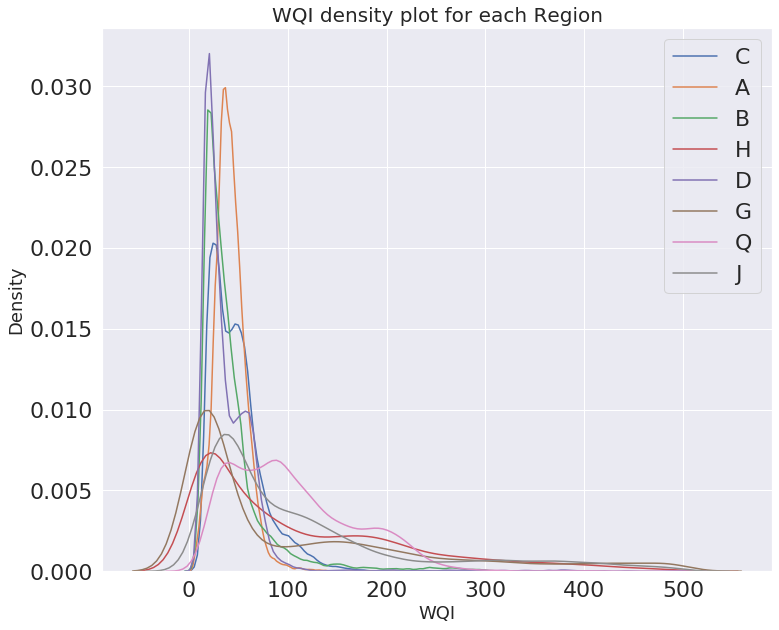

In [3]:
# Creation of a samples list with more than 4000 measurements
types =  chemical_stations.dropna(subset=['WQI'])
types = types['Drainage Region'].value_counts()
types = list(types[types.values > 4000].index)
# Plot of distribution
plt.subplots(figsize=(12, 10))
# Graph for each type
for b_type in types:
    # Selecting the type of WQI
    subset = chemical_stations[chemical_stations['Drainage Region'] == b_type]
     # Densitiy plot of WQI
    sns.kdeplot(subset['WQI'].dropna(),
               label = b_type, shade = False, alpha = 1);
    # Label the plot
plt.xlabel('WQI', size = 18); plt.ylabel('Density', size = 18); 
plt.title('WQI density plot for each Region', size = 20);

We can see that the Region has an effect on the WQI although perhaps not as much as expected. I am going to include this categorical variable as a variable to predict the WQI because it may provide information when it comes to predicting the WQI.

#### Variable: Subregion (Categorical variable)

In [5]:
print("There are",len(chemical_stations["Subdrainage Region"].unique()), "different subregions")
chemical_stations["Subdrainage Region"].unique()

There are 173 different subregions


array(['A23', 'A21', 'A24', 'A22', 'A30', 'A40', 'A50', 'A60', 'A70',
       'A80', 'A90', 'B10', 'B11', 'B20', 'B32', 'B31', 'B40', 'B50',
       'B60', 'B70', 'B80', 'B90', 'C11', 'C13', 'C12', 'C23', 'C22',
       'C21', 'C24', 'C25', 'C30', 'C40', 'C42', 'C52', 'C51', 'C60',
       'C70', 'C80', 'C90', 'D14', 'D15', 'D12', 'D13', 'D11', 'D20',
       'D34', 'D33', 'D32', 'D35', 'D31', 'D41', 'D55', 'D53', 'D72',
       'D73', 'D80', 'E10', 'E20', 'E40', 'G10', 'G20', 'G30', 'G40',
       'G50', 'H10', 'H20', 'H30', 'H40', 'H50', 'H60', 'H70', 'H80',
       'H90', 'J12', 'J11', 'J13', 'J25', 'J21', 'J22', 'J23', 'J33',
       'J35', 'J34', 'J40', 'K10', 'K20', 'K30', 'K40', 'K50', 'K60',
       'K70', 'K80', 'K90', 'L30', 'L60', 'L70', 'L82', 'L90', 'M10',
       'M20', 'N12', 'N24', 'N22', 'N23', 'N30', 'N40', 'P10', 'P30',
       'P40', 'Q13', 'Q12', 'Q14', 'Q21', 'Q30', 'Q43', 'Q44', 'Q41',
       'Q50', 'Q60', 'Q70', 'Q80', 'Q92', 'Q91', 'Q93', 'Q94', 'R10',
       'R20', 'R30',

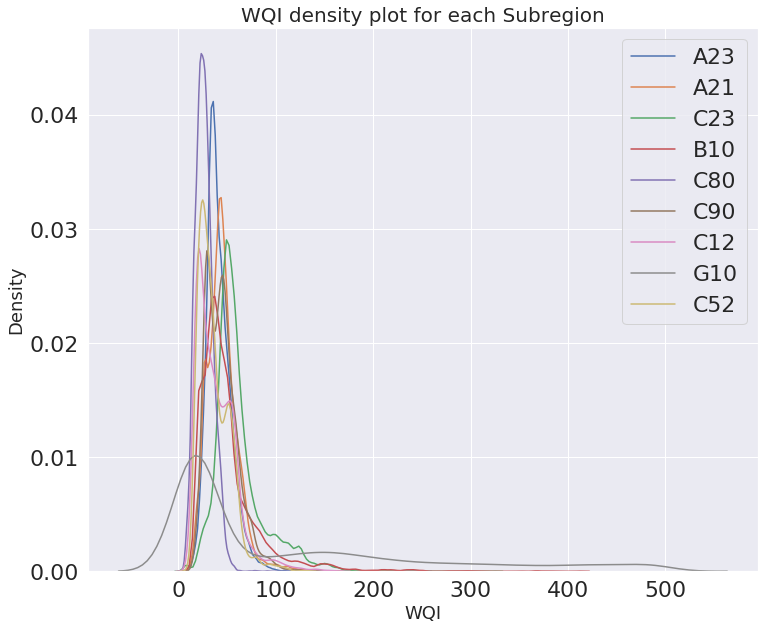

In [11]:
# Creation of a samples list with more than 5000 measurements
types =  chemical_stations.dropna(subset=['WQI'])
types = types['Subdrainage Region'].value_counts()
types = list(types[types.values > 5000].index)
# Plot of distribution
plt.subplots(figsize=(12, 10))
# Graph for each type
for b_type in types:
    # Selecting the type of WQI
    subset = chemical_stations[chemical_stations['Subdrainage Region'] == b_type]
     # Densitiy plot of WQI
    sns.kdeplot(subset['WQI'].dropna(),
               label = b_type, shade = False, alpha = 1);
    # Label the plot
plt.xlabel('WQI', size = 18); plt.ylabel('Density', size = 18); 
plt.title('WQI density plot for each Subregion', size = 20);

In this case, the subregion does not seem to affect the WQI much. It would also provide information that is very similar to the variable "Region" and including both would not make sense. On the other hand, there are 173 subregions, which would mean putting many predictive variables in the models apparently unnecessarily.

####  Variable: POINT ID (Categorical variable)

In [8]:
chemical_stations["POINT ID"].dtype

dtype('int64')

In [9]:
# Change the POINT ID to object:
chemical_stations["POINT ID"]=chemical_stations["POINT ID"].astype("object")

In [10]:
print("There are",len(chemical_stations["POINT ID"].unique()), "different measuring points")
chemical_stations["POINT ID"].unique()

There are 1045 different measuring points


array([90160, 90164, 90165, ..., 177887, 177888, 178756], dtype=object)

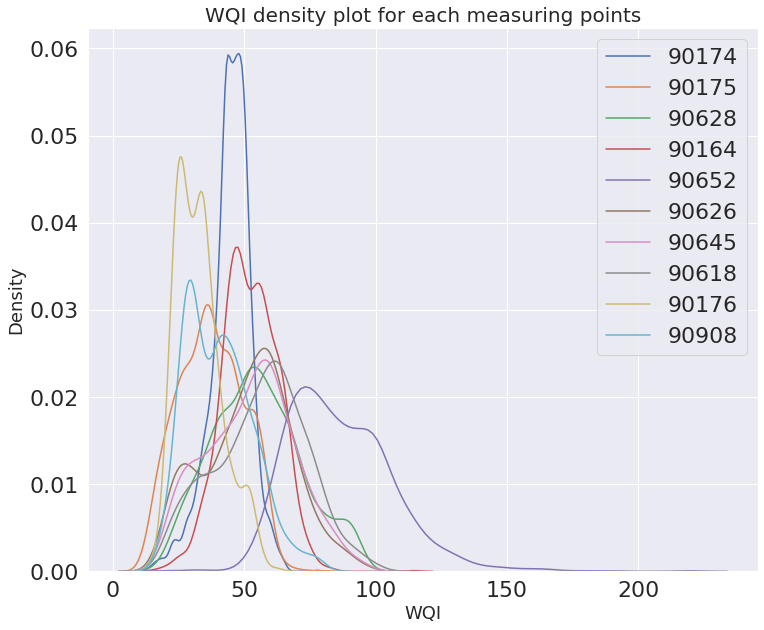

In [12]:
# Creation of a samples list with more than 1300 measurements
types =  chemical_stations.dropna(subset=['WQI'])
types = types['POINT ID'].value_counts()
types = list(types[types.values > 1300].index)
# Plot of distribution
plt.subplots(figsize=(12, 10))
# Graph for each type
for b_type in types:
    # Selecting the type of WQI
    subset = chemical_stations[chemical_stations['POINT ID'] == b_type]
     # Densitiy plot of WQI
    sns.kdeplot(subset['WQI'].dropna(),
               label = b_type, shade = False, alpha = 1);
    # Label the plot
plt.xlabel('WQI', size = 18); plt.ylabel('Density', size = 18); 
plt.title('WQI density plot for each measuring points', size = 20);

The measurement points do seem to contribute information to the prediction of the WQI. However, using this categorical variable as a variable for the prediction of the WQI would mean having 1045 new variables and would greatly slow down the process.

#### Variable: Longitude/Latitude (Numerical variable)

Text(0.5, 1.0, 'Measurement points according to their WQI class')

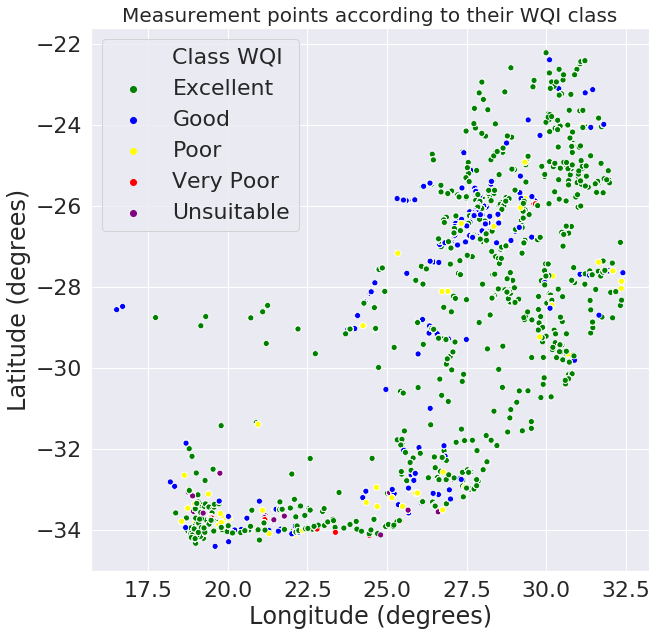

In [7]:
# See the map
plt.figure (figsize = (10,10)) 
sns.scatterplot (chemical_stations['Longitude (degrees)'], chemical_stations['Latitude (degrees)'], 
                 hue=chemical_stations["Class WQI"], palette=["green", "blue", "yellow", "red", "purple"])
plt.title("Measurement points according to their WQI class", size=20)

At first glance it seems that latitude and longitude could have some effect on water quality, the further south and east it seems that the water quality is worse.

In [14]:
print("There are",len(chemical_stations["Latitude (degrees)"].unique()), "different latitudes")
print("There are",len(chemical_stations["Longitude (degrees)"].unique()), "different longitudes")

There are 939 different latitudes
There are 947 different longitudes


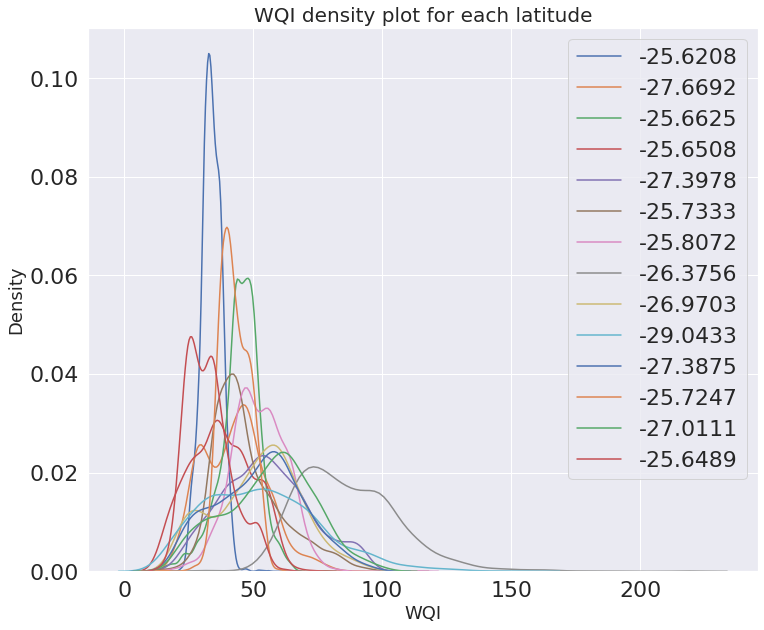

In [15]:
# Creation of a samples list with more than 1300 measurements
types =  chemical_stations.dropna(subset=['WQI'])
types = types['Latitude (degrees)'].value_counts()
types = list(types[types.values > 1300].index)
# Plot of distribution
plt.subplots(figsize=(12, 10))
# Graph for each type
for b_type in types:
    # Selecting the type of WQI
    subset = chemical_stations[chemical_stations['Latitude (degrees)'] == b_type]
     # Densitiy plot of WQI
    sns.kdeplot(subset['WQI'].dropna(),
               label = b_type, shade = False, alpha = 1);
    # Label the plot
plt.xlabel('WQI', size = 18); plt.ylabel('Density', size = 18); 
plt.title('WQI density plot for each latitude', size = 20);

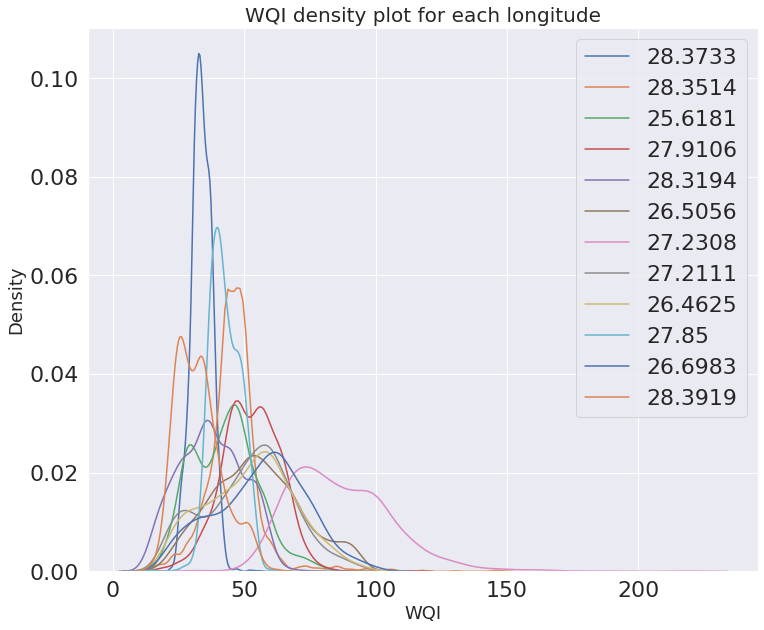

In [16]:
# Creation of a samples list with more than 1300 measurements
types =  chemical_stations.dropna(subset=['WQI'])
types = types['Longitude (degrees)'].value_counts()
types = list(types[types.values > 1300].index)
# Plot of distribution
plt.subplots(figsize=(12, 10))
# Graph for each type
for b_type in types:
    # Selecting the type of WQI
    subset = chemical_stations[chemical_stations['Longitude (degrees)'] == b_type]
     # Densitiy plot of WQI
    sns.kdeplot(subset['WQI'].dropna(),
               label = b_type, shade = False, alpha = 1);
    # Label the plot
plt.xlabel('WQI', size = 18); plt.ylabel('Density', size = 18); 
plt.title('WQI density plot for each longitude', size = 20);

Perhaps it was obvious, but I think it makes sense to use as variables that represent the position of the measurement points, the longitude and latitude variables as the prediction variable of the WQI because from the graphs it can be seen that they have an influence on the WQI and being a numerical variable, it will not slow down the process as much as if we used a categorical variable that would introduce many more variables into the model (there are 1045 measurement points, 173 subregions and 21 different regions).

### 2) Inorganic Chemistry Index Classes (Categorical variable)

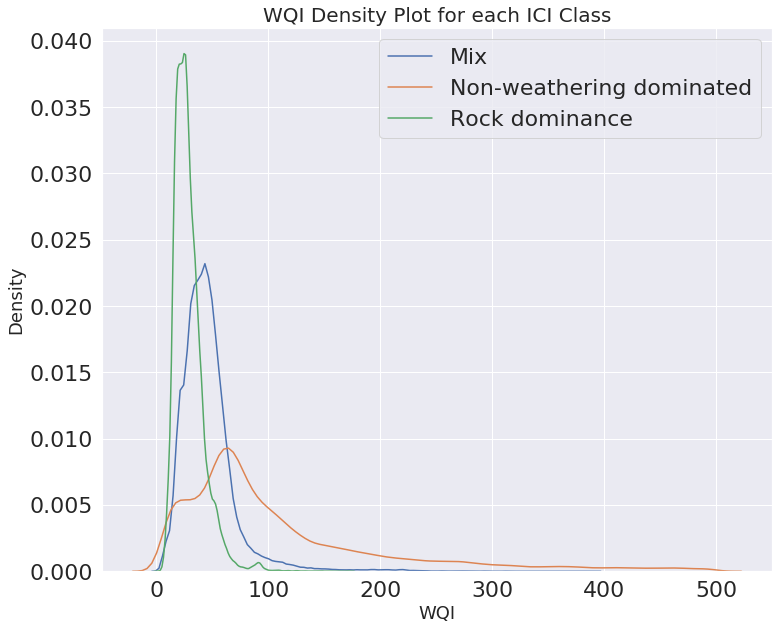

In [17]:
types =  chemical_stations.dropna(subset=['WQI'])
types = types['Class ICI'].value_counts()
types = list(types[types.values > 1300].index)
# Plot of distribution
plt.subplots(figsize=(12, 10))
# Graph for each type
for b_type in types:
    # Selecting the type of WQI
    subset = chemical_stations[chemical_stations['Class ICI'] == b_type]
     # Densitiy plot of WQI
    sns.kdeplot(subset['WQI'].dropna(),
               label = b_type, shade = False, alpha = 1);
    # Label the plot
plt.xlabel('WQI', size = 18); plt.ylabel('Density', size = 18); 
plt.title('WQI Density Plot for each ICI Class', size = 20);

This variable could contribute information to the prediction of the WQI, but what is necessary to have this variable? Precisely you need to measure chlorine, sulfate, nitrites, phosphates and bicarbonates (Characterisation of the inorganic chemistry of surface waters in SA.pdf). It does not make sense if what I am looking for is to predict the value of the WQI with the fewest possible parameters and the easiest to measure.

## Correlations between Features and Target

At first I will use as features some measurements of chemical concentrations, as well as PH, electrical conductivity and geographical coordinates.

Later I will use only the electrical conductivity, the PH and the geographic coordinates. These measurements are easy to obtain, can be measured on site and do not necessarily require taking them to the laboratory. 

In [63]:
features_target=chemical_stations[['EC (μS/cm)','PH', 'SO4 (mg/L)','PO4 (mg/L)', 'Si (mg/L)',
                                'TAL (CaCO3) (mg/L)','NH4 (mg/L)',"Latitude (degrees)", "Longitude (degrees)","WQI"]]

In [65]:
# Find all correlations and sort 
correlations_features_target = features_target.corr()['WQI'].sort_values()

# Print the most negative correlations
print(correlations_features_target.head(), '\n')

# Print the most positive correlations
print(correlations_features_target.tail())

Latitude (degrees)    -0.388065
Longitude (degrees)   -0.309380
Si (mg/L)              0.016234
PO4 (mg/L)             0.040418
NH4 (mg/L)             0.045146
Name: WQI, dtype: float64 

PH                    0.104537
TAL (CaCO3) (mg/L)    0.564767
SO4 (mg/L)            0.625172
EC (μS/cm)            0.989628
WQI                   1.000000
Name: WQI, dtype: float64


We see that WQI has a very strong linear relationship with Electrical Conductivity and a high linear relationship also with sulfate and CaCO3.

### Relationship between EC and WQI

To visualize the relationship between Electrical Conductivity and WQI, I use a scatter plot. I'm going to use color to represent a third categorical variable: "Drainage Region"

Text(0.5, 1, 'WQI vs EC')

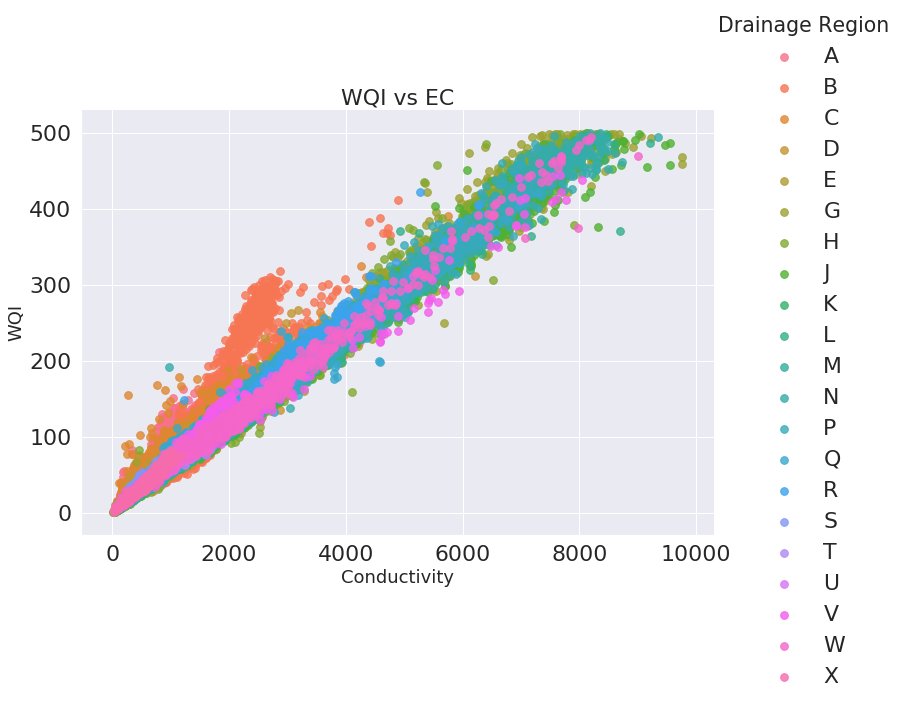

In [55]:
figsize(12, 10)

# Extract the building types
EC_WQI=chemical_stations[["Drainage Region", "WQI", "EC (μS/cm)"]]
EC_WQI["Drainage Region"]=chemical_stations.dropna(subset=["WQI"])["Drainage Region"]
# Use seaborn to plot a scatterplot of EC vs WQI
ax=sns.lmplot(x='EC (μS/cm)', y='WQI', 
          hue = 'Drainage Region', data = EC_WQI,
          scatter_kws = {'alpha': 0.8, 's': 60}, fit_reg = False,
          height=7, aspect = 1.5);

# Plot labeling
plt.xlabel("Conductivity", size = 18)
plt.ylabel('WQI', size = 18)
plt.title('WQI vs EC', size = 22)

We see that the relationship is perfectly linear, but it can be seen that regions A and B seem to carry another linear trend.

In [57]:
# Regions A and B
regions_A_B=chemical_stations[(chemical_stations["Drainage Region"]=="A")|
                            (chemical_stations["Drainage Region"]=="B")]
print(len(regions_A_B), "samples from regions A and B")

# Rest of regions
regions_without_A_B=chemical_stations[(chemical_stations["Drainage Region"] != "A")&
                        (chemical_stations["Drainage Region"] != "B") ]
print(len(regions_without_A_B), "samples from other regions")

72020 samples from regions A and B
125115 samples from other regions


Text(0.5, 1, 'WQI vs EC in regions A and B')

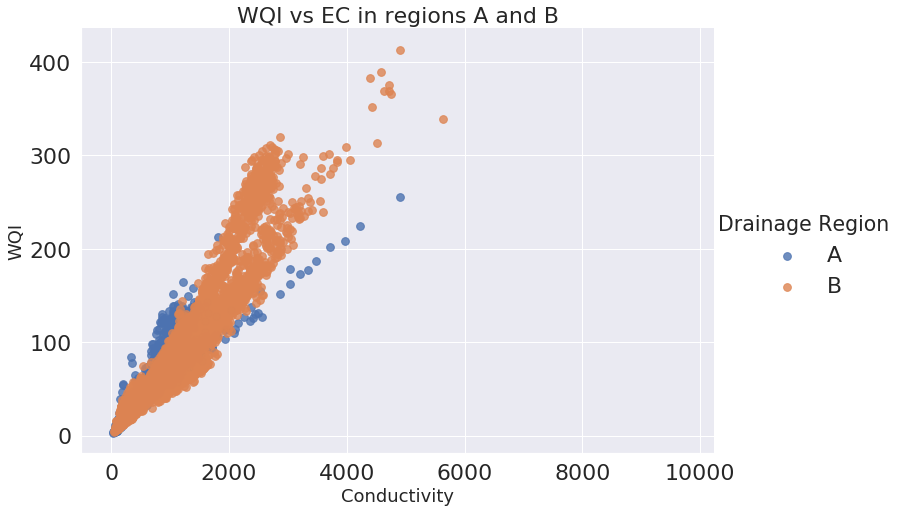

In [59]:
figsize(12, 10)

# Extract the building types
EC_WQI["Drainage Region"]=regions_A_B.dropna(subset=["WQI"])["Drainage Region"]
# Use seaborn to plot a scatterplot of EC vs WQI
ax=sns.lmplot(x='EC (μS/cm)', y='WQI', 
          hue = 'Drainage Region', data = EC_WQI,
          scatter_kws = {'alpha': 0.8, 's': 60}, fit_reg = False,
          height=7, aspect = 1.5);

# Plot labeling
plt.xlabel("Conductivity", size = 18)
plt.ylabel('WQI', size = 18)
plt.title('WQI vs EC in regions A and B', size = 22)

Text(0.5, 1, 'WQI vs EC in the rest of the regions')

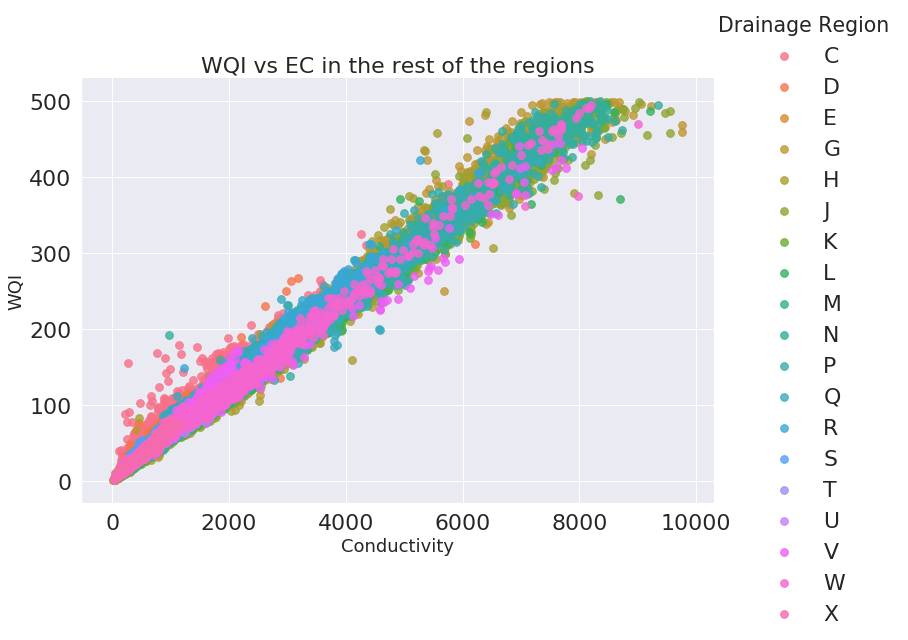

In [60]:
figsize(12, 10)

# Extract the building types
EC_WQI["Drainage Region"]=regions_without_A_B.dropna(subset=["WQI"])["Drainage Region"]
# Use seaborn to plot a scatterplot of EC vs WQI
ax=sns.lmplot(x='EC (μS/cm)', y='WQI', 
          hue = 'Drainage Region', data = EC_WQI,
          scatter_kws = {'alpha': 0.8, 's': 60}, fit_reg = False,
          height=7, aspect = 1.5);

# Plot labeling
plt.xlabel("Conductivity", size = 18)
plt.ylabel('WQI', size = 18)
plt.title('WQI vs EC in the rest of the regions', size = 22)

### Correlation matrices

In [62]:
features_target.head()

Latitude (degrees)    -0.388065
Longitude (degrees)   -0.309380
Si (mg/L)              0.016234
PO4 (mg/L)             0.040418
NH4 (mg/L)             0.045146
Name: WQI, dtype: float64

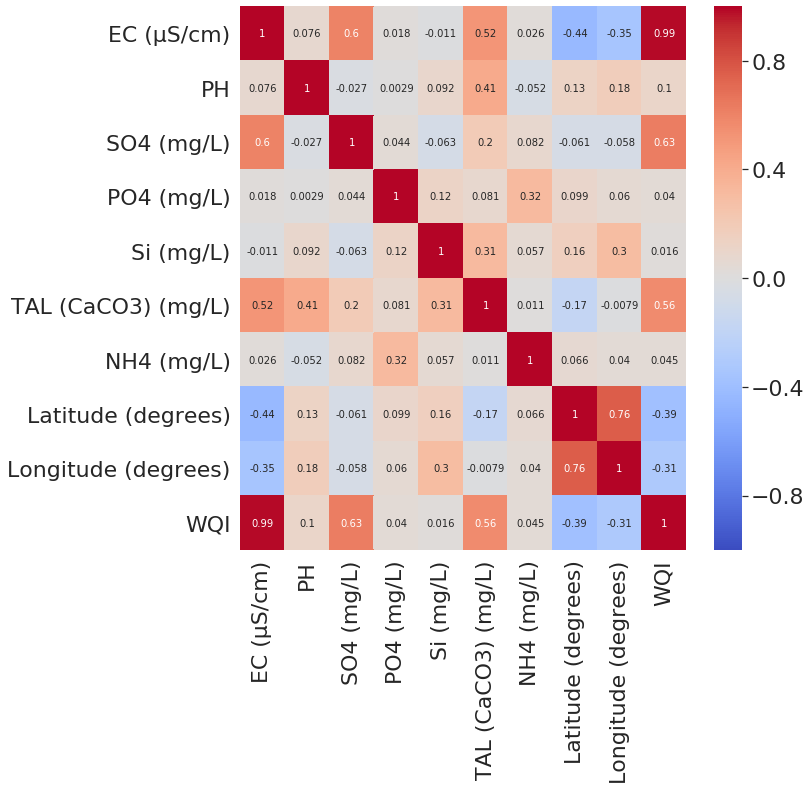

In [66]:
#Linear relationships
# Correlation matrix
f, ax = plt.subplots(figsize=(10, 10))
sns.heatmap(features_target.corr(),annot = True, vmin=-1, vmax=1, center= 0, cmap= 'coolwarm')

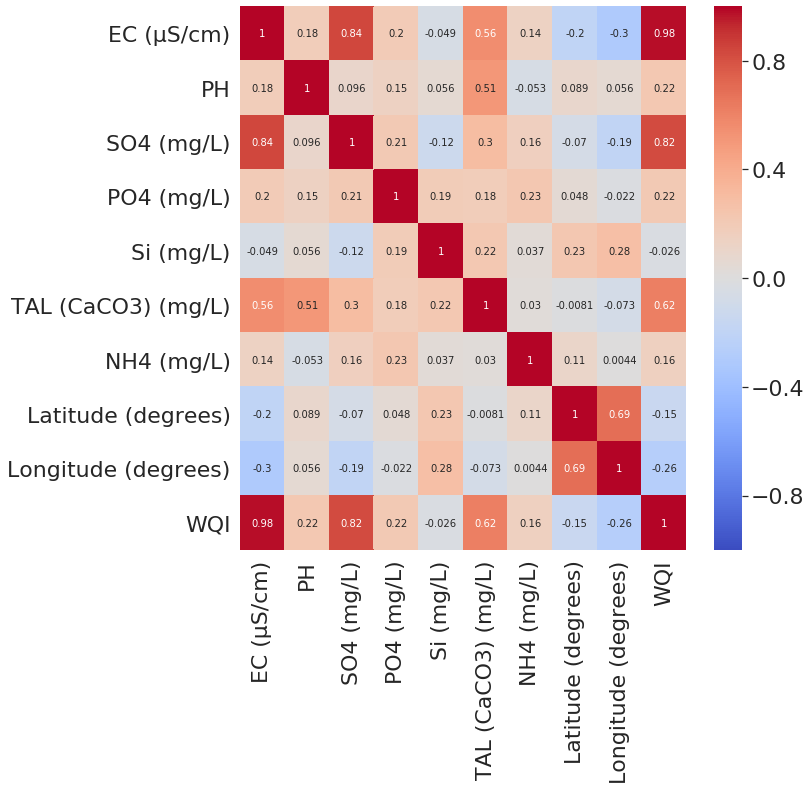

In [67]:
#Other type of correlations
# Correlation matrix
f, ax = plt.subplots(figsize=(10, 10))
sns.heatmap(features_target.corr(method="spearman"),annot = True, vmin=-1, vmax=1, center= 0, cmap= 'coolwarm')

From these correlations we can conclude that WQI has a very strong linear relationship with electrical conductivity, but high non-linear relationships of another type with sulfate, CaCO3. It also improves the non-linear correlation with PH, PO4, and NH4.

We must discard those collinear variables to avoid overfitting the prediction. Therefore, we are going to eliminate Sulfate (SO4) that has a very high relationship with Electrical Conductivity and Longitude (high relationship with Latitude).

## Feature selection

### Split Into Training and Testing Sets

In [68]:
features=chemical_stations[['EC (μS/cm)', "PH", "PO4 (mg/L)", 'Si (mg/L)', 'NH4 (mg/L)',
                            "Latitude (degrees)", 'WQI' ]]

In [69]:
no_wqi = features[features['WQI'].isna()]
wqi = features[features['WQI'].notnull()]

print(no_wqi.shape)
print(wqi.shape)

(0, 7)
(197135, 7)


In [71]:
# Separate out the features and targets
features=wqi.drop(columns="WQI")
targets = pd.DataFrame(wqi['WQI'])

# Split into 80% training and 20% testing set
X, X_test, y, y_test = train_test_split(features, targets, test_size = 0.2, random_state = 42)

print(X.shape)
print(X_test.shape)
print(y.shape)
print(y_test.shape)

(157708, 6)
(39427, 6)
(157708, 1)
(39427, 1)


### Establish a Baseline

It is important that we establish a baseline before doing the learning models, because if the models we build cannot overcome this baseline, then perhaps machine learning is not the most suitable for this problem.

For a regression task, a suitable baseline is to predict the mean value of the target, in this case the WQI in the training set for all the examples in the test set.

If the models we create cannot do better than guessing the median value, then we will have to rethink the approach.

In [72]:
# Function to calculate mean absolute error
def mae(y_true, y_pred):
    return np.mean(abs(y_true - y_pred))

# Calculate the median and evaluate it in the test set.
baseline_guess = np.median(y)

print('The baseline guess is a score of %0.2f' % baseline_guess)
print("Baseline Performance on the test set: MAE = %0.4f" % mae(y_test, baseline_guess))

The baseline guess is a score of 41.47
Baseline Performance on the test set: MAE = 31.4240


This shows an MAE of 32%. We will see if the models that we create exceed this value.

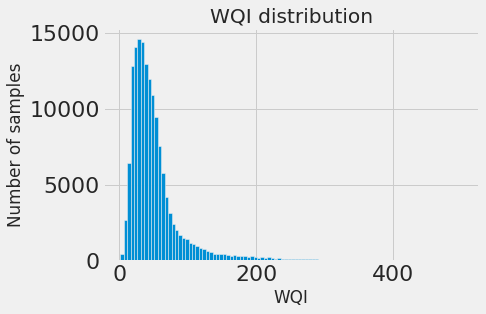

In [73]:
# WQI Histogram
plt.style.use('fivethirtyeight')
plt.hist(y['WQI'].dropna(), bins = 100);
plt.xlabel('WQI'); plt.ylabel('Number of samples'); 
plt.title('WQI distribution');

### Scaling Features

The last step to take before you can build the models is to scale the features. This is necessary because the characteristics are in different units and we want to normalize the characteristics so that the units do not affect the algorithm.

In [74]:
# Create the scaler object with a range of 0-1
scaler = MinMaxScaler(feature_range=(0, 1))

# Fit on the training data
scaler.fit(X)

# Transform both the training and testing data
X = scaler.transform(X)
X_test = scaler.transform(X_test)

In [75]:
# Convert y to one-dimensional array (vector)
y = np.array(y).reshape((-1, ))
y_test = np.array(y_test).reshape((-1, ))

At first, what we want is to determine the benchmark performance of each model. Then to find a better configuration for each case, it is necessary to adjust the hyperparameters.

## Models to Evaluate

We will compare five different machine learning models using the great Scikit-Learn library:

- Linear Regression
- Support Vector Machine Regression
- Random Forest Regression
- Gradient Boosting Regression
- K-Nearest Neighbors Regression

#### Metric: MAE

In [76]:
# Function to calculate mean absolute error
def mae(y_true, y_pred):
    return np.mean(abs(y_true - y_pred))

# Takes in a model, trains the model, and evaluates the model on the test set
def fit_and_evaluate(model):
    
    # Train the model
    model.fit(X, y)
    
    # Make predictions and evalute
    model_pred = model.predict(X_test)
    model_mae = mae(y_test, model_pred)
    
    # Return the performance metric
    return model_mae

In [77]:
# Linear Regression
lr = LinearRegression()
lr_mae = fit_and_evaluate(lr)

print('Linear Regression Performance on the test set: MAE = %0.4f' % lr_mae)

# SVR
svm = SVR(C = 1000, gamma = 0.1)
svm_mae = fit_and_evaluate(svm)

print('Support Vector Machine Regression Performance on the test set: MAE = %0.4f' % svm_mae)

# Random Forest
random_forest = RandomForestRegressor(random_state=60)
random_forest_mae = fit_and_evaluate(random_forest)

print('Random Forest Regression Performance on the test set: MAE = %0.4f' % random_forest_mae)

# Gradient Boosting Regressor
gradient_boosted = GradientBoostingRegressor(random_state=60)
gradient_boosted_mae = fit_and_evaluate(gradient_boosted)

print('Gradient Boosted Regression Performance on the test set: MAE = %0.4f' % gradient_boosted_mae)

# k Neighbors Regressor
knn = KNeighborsRegressor(n_neighbors=10)
knn_mae = fit_and_evaluate(knn)

print('K-Nearest Neighbors Regression Performance on the test set: MAE = %0.4f' % knn_mae)

Linear Regression Performance on the test set: MAE = 4.5624
Support Vector Machine Regression Performance on the test set: MAE = 3.9411
Random Forest Regression Performance on the test set: MAE = 2.9030
Gradient Boosted Regression Performance on the test set: MAE = 3.5914
K-Nearest Neighbors Regression Performance on the test set: MAE = 3.7404


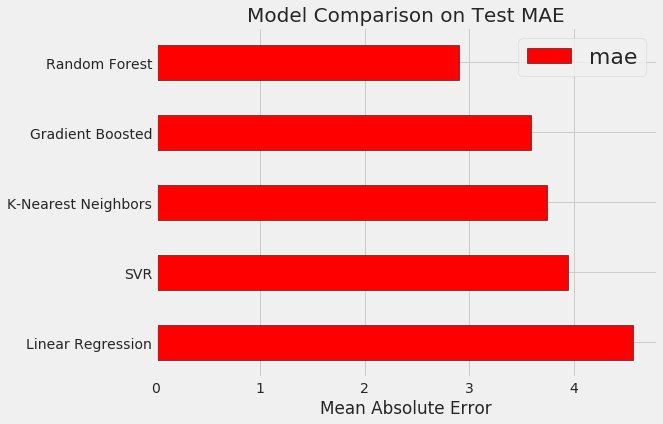

In [79]:
figsize(8, 6)

# Dataframe to hold the results
model_comparison = pd.DataFrame({'model': ['Linear Regression', "SVR",'Random Forest', 'Gradient Boosted',
                                            'K-Nearest Neighbors'],
                                 'mae': [lr_mae, svm_mae, random_forest_mae, 
                                         gradient_boosted_mae, knn_mae]})

# Horizontal bar chart of test mae
model_comparison.sort_values('mae', ascending = False).plot(x = 'model', y = 'mae', kind = 'barh',
                                                           color = 'red', edgecolor = 'black')

# Plot formatting
plt.ylabel(''); plt.yticks(size = 14); plt.xlabel('Mean Absolute Error'); plt.xticks(size = 14)
plt.title('Model Comparison on Test MAE', size = 20);

The best performing model is the Random Forest. However, this comparison is not the most fair, as we are mainly using the default hyperparameters.

From these results, we can conclude that machine learning is applicable since all models exceed the baseline with growth.

## Model Optimization
## Hyperparameter Tuning with Random Search and Cross Validation

### Random Forest

In [78]:
rf = RandomForestRegressor(random_state = 42)
from pprint import pprint
# Look at parameters used by our current forest
print('Parameters currently in use:\n')
pprint(rf.get_params())

Parameters currently in use:

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'criterion': 'mse',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 42,
 'verbose': 0,
 'warm_start': False}


In [80]:
# Number of trees used in the process
n_estimators=[100,200,300,400, 500, 600, 700, 800, 900, 1000, 1100,1200,1500]

# Maximum depth of each tree
max_depth = [2, 3, 5, 10, 15,20,30]

# Minimum number of samples per leaf
min_samples_leaf = [1, 2, 4, 6, 8,10]

# Minimum number of samples to split a node
min_samples_split = [2, 4, 6, 10,15,20]

# Maximum number of features to consider for making splits
max_features = ['auto', 'sqrt', 'log2', None]

# Method of selecting samples for training each tree
bootstrap = [True, False]

# Define the grid of hyperparameters to search
hyperparameter_grid = {'n_estimators': n_estimators,
                       'max_depth': max_depth,
                       'min_samples_leaf': min_samples_leaf,
                       'min_samples_split': min_samples_split,
                       'max_features': max_features,
                      'bootstrap': bootstrap}

In [81]:
# Create the model to use for hyperparameter tuning
rf_model = RandomForestRegressor(random_state = 42)

# Set up the random search with 4-fold cross validation
randomforest_cv = RandomizedSearchCV(estimator=rf_model,
                               param_distributions=hyperparameter_grid,
                               cv=4, n_iter=25, 
                               return_train_score=True,
                               n_jobs = -1, verbose = 2, 
                               random_state=42)

In [82]:
# Fit on the training data
randomforest_cv.fit(X, y)

Fitting 4 folds for each of 25 candidates, totalling 100 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed: 48.8min
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed: 105.8min finished


RandomizedSearchCV(cv=4, error_score=nan,
                   estimator=RandomForestRegressor(bootstrap=True,
                                                   ccp_alpha=0.0,
                                                   criterion='mse',
                                                   max_depth=None,
                                                   max_features='auto',
                                                   max_leaf_nodes=None,
                                                   max_samples=None,
                                                   min_impurity_decrease=0.0,
                                                   min_impurity_split=None,
                                                   min_samples_leaf=1,
                                                   min_samples_split=2,
                                                   min_weight_fraction_leaf=0.0,
                                                   n_estimators=100,
                              

#### Best hyperparameters

In [83]:
randomforest_cv.best_estimator_

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=30, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=2,
                      min_samples_split=15, min_weight_fraction_leaf=0.0,
                      n_estimators=200, n_jobs=None, oob_score=False,
                      random_state=42, verbose=0, warm_start=False)

The best random forest model has the following hyperparameters:
- bootstrap=True,
- n_estimators=200,
- max_depth=30,
- min_samples_leaf=2,
- min_samples_split=15,
- max_features="auto"

We will use grid search with a grid that only has the n_estimators hyperparameter.

In [84]:
## Create a range of trees to evaluate
trees_grid = {'n_estimators': [100, 150, 200, 250, 300, 350, 400, 450, 500, 550, 600, 650, 700, 750, 800, 850, 900,1000,1100]}

model = RandomForestRegressor(bootstrap=True, max_depth =30,
                                  min_samples_leaf = 2,
                                  min_samples_split = 15,
                                  max_features = "auto",
                              criterion= "mse",
                                  random_state = 42)

# Grid Search Object using the trees range and the random forest model
rf_grid_search = GridSearchCV(estimator = model, param_grid=trees_grid, cv = 4, 
                            verbose = 0,
                           n_jobs = None)

In [85]:
# Fit the grid search
rf_grid_search.fit(X, y)

GridSearchCV(cv=4, error_score=nan,
             estimator=RandomForestRegressor(bootstrap=True, ccp_alpha=0.0,
                                             criterion='mse', max_depth=30,
                                             max_features='auto',
                                             max_leaf_nodes=None,
                                             max_samples=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=2,
                                             min_samples_split=15,
                                             min_weight_fraction_leaf=0.0,
                                             n_estimators=100, n_jobs=None,
                                             oob_score=False, random_state=42,
                                             verbose=0, warm_start=False),
             iid='deprecated', n_jobs=

In [86]:
# Default model
rf_default_model = RandomForestRegressor(random_state = 42)

# Select the best model
rf_final_model = rf_grid_search.best_estimator_

rf_final_model

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=30, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=2,
                      min_samples_split=15, min_weight_fraction_leaf=0.0,
                      n_estimators=1100, n_jobs=None, oob_score=False,
                      random_state=42, verbose=0, warm_start=False)

#### Running Time

We can time how long it takes to train the two models using the %timeit magic command in Jupyter Notebooks.

In [87]:
%%timeit -n 1 -r 5

# Default model
rf_default_model.fit(X, y)

1min 30s ± 879 ms per loop (mean ± std. dev. of 5 runs, 1 loop each)


In [88]:
%%timeit -n 1 -r 5

# Tuned model
rf_final_model.fit(X, y)

13min 34s ± 2.95 s per loop (mean ± std. dev. of 5 runs, 1 loop each)


In [89]:
# Compare the performance of the default Random Forest Regressor to the tuned model: 

rf_default_pred = rf_default_model.predict(X_test)
rf_final_pred = rf_final_model.predict(X_test)

print('Default model performance on the test set: MAE = %0.4f.' % mae(y_test, rf_default_pred))
print('Final model performance on the test set:   MAE = %0.4f.' % mae(y_test, rf_final_pred))

Default model performance on the test set: MAE = 2.9043.
Final model performance on the test set:   MAE = 2.9249.


I have not managed to improve the MAE value with the adjusted model. In addition, the execution time is 13 times longer in the final model, so in this case, we would stay with the reference model.

#### MAPE Calculation

In [90]:
# Calculate the MAPE for the default model:
mape=100*(mae(y_test, rf_default_pred)/y_test)

accuracy=100-np.mean(mape)
print("Accuracy default model", round(accuracy,2), '%.')

Accuracy default model 91.49 %.


In [91]:
# Calculate the MAPE for the final model:
mape=100*(mae(y_test, rf_final_pred)/y_test)

accuracy=100-np.mean(mape)
print("Accuracy final model", round(accuracy,2), '%.')

Accuracy final model 91.43 %.


### Test Values and Predictions

We can plot the distribution of true values on the test set and the predicted values on the test set and the histogram of residuals:

<Figure size 576x432 with 0 Axes>

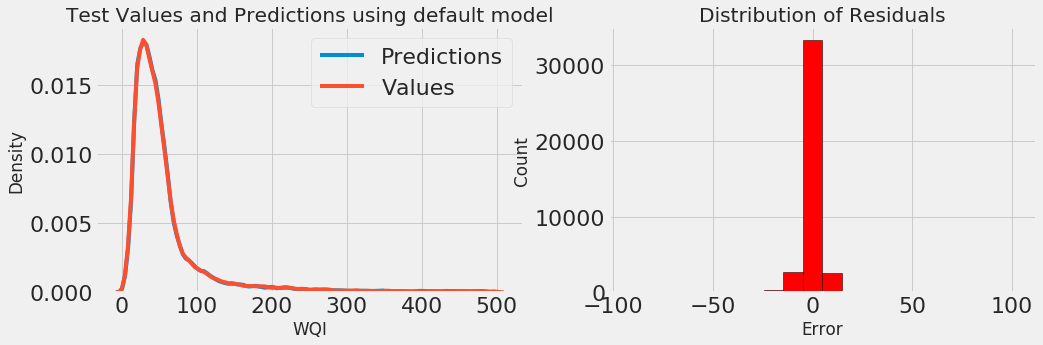

In [95]:
## Using default model

fig=plt.figure()
plt.figure(figsize=(15,10))

# Density plot of the final predictions and the test values
plt.subplot2grid((2,2), (0,0))
sns.kdeplot(rf_default_pred, label = 'Predictions')
sns.kdeplot(y_test, label = 'Values')
# Label the plot
plt.xlabel('WQI'); plt.ylabel('Density');
plt.title('Test Values and Predictions using default model');

# Calculate the residuals
plt.subplot2grid((2,2), (0,1))
default_residuals = rf_default_pred - y_test
# Plot the residuals in a histogram
plt.hist(default_residuals, color = 'red', bins = 20,
         edgecolor = 'black')
plt.xlabel('Error'); plt.ylabel('Count')
plt.title('Distribution of Residuals');

<Figure size 576x432 with 0 Axes>

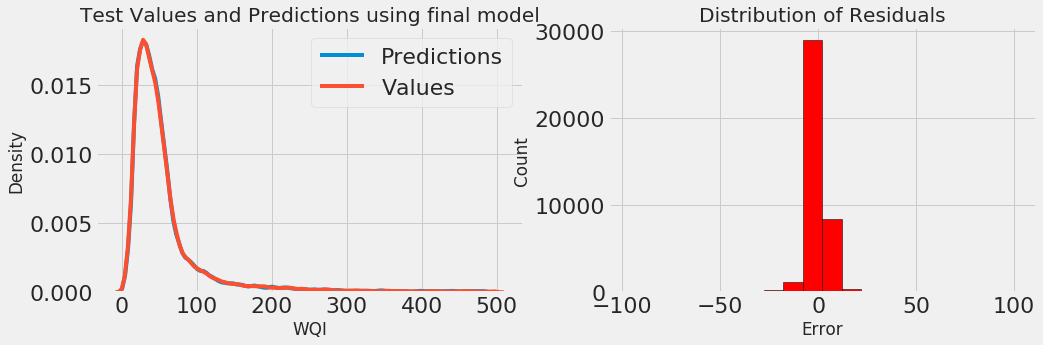

In [96]:
## Using final model

fig=plt.figure()
plt.figure(figsize=(15,10))

# Density plot of the final predictions and the test values
plt.subplot2grid((2,2), (0,0))
sns.kdeplot(rf_final_pred, label = 'Predictions')
sns.kdeplot(y_test, label = 'Values')
# Label the plot
plt.xlabel('WQI'); plt.ylabel('Density');
plt.title('Test Values and Predictions using final model');

# Calculate the residuals
plt.subplot2grid((2,2), (0,1))
final_residuals = rf_final_pred - y_test
# Plot the residuals in a histogram
plt.hist(final_residuals, color = 'red', bins = 20,
         edgecolor = 'black')
plt.xlabel('Error'); plt.ylabel('Count')
plt.title('Distribution of Residuals');

The models predictions follow the distribution of the actual values very well in both cases. However, using the default model the residuals are normally distributed, which is ideal since it means that the model is wrong the same amount in both directions (high and low).

## Feature Importances

In [99]:
importance = rf_final_model.feature_importances_

In [100]:
# Extract the feature importances into a dataframe
feature_results = pd.DataFrame({'feature': list(features.columns), 
                                'importance': rf_final_model.feature_importances_})

# Show the top 10 most important
feature_results = feature_results.sort_values('importance', ascending = False).reset_index(drop=True)

feature_results.head(10)

,feature,importance
0,EC (μS/cm),0.986101
1,Latitude (degrees),0.009234
2,Si (mg/L),0.001419
3,PO4 (mg/L),0.001289
4,PH,0.000991
5,NH4 (mg/L),0.000966


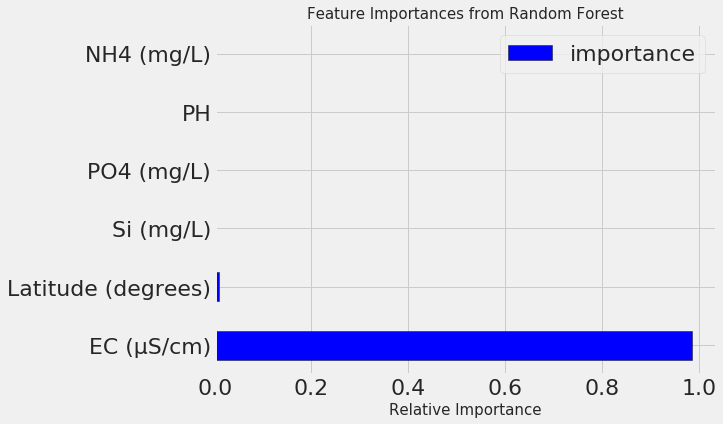

In [106]:
figsize(8, 6)
plt.style.use('fivethirtyeight')

# Plot the 10 most important features in a horizontal bar chart
feature_results.plot(x = 'feature', y = 'importance', 
                                 edgecolor = 'k',
                                 kind='barh', color = 'blue');
plt.xlabel('Relative Importance', size = 15); plt.ylabel('')
plt.title('Feature Importances from Random Forest', size = 15);

It seems that there is only one important characteristic, which is electrical conductivity.

# Features: Electrical Conductivity, PH and Latitude

We are going to try to use only these 3 parameters, easy to measure and fast to see if there is much difference with respect to the use of the previous variables.

### Pairplot

We are going to examine these variables together using the pair diagram. Thus we see the scatter diagrams between pairs of variables and histograms of individual variables on the diagonal.

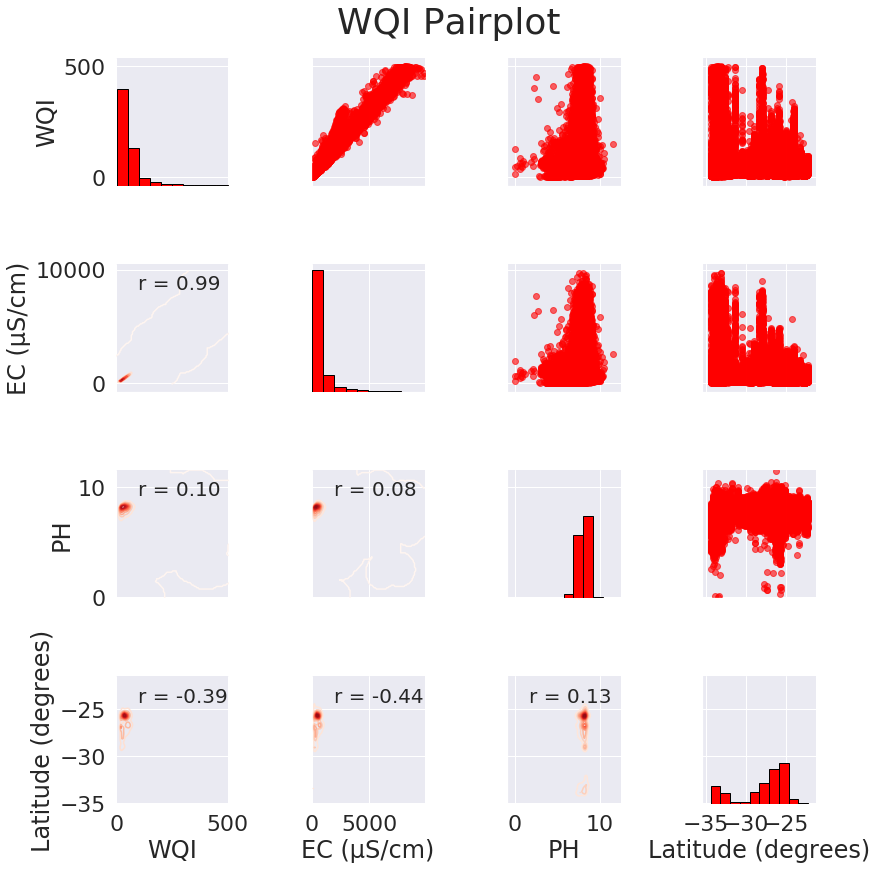

In [10]:
# Extract the columns to plot
wqi_plot=chemical_stations[["WQI", "EC (μS/cm)", "PH", "Latitude (degrees)"]]

# Function to calculate correlation coefficient between two columns
def corr_func(x, y, **kwargs):
    r = np.corrcoef(x, y)[0][1]
    ax = plt.gca()
    ax.annotate("r = {:.2f}".format(r),
                xy=(.2, .8), xycoords=ax.transAxes,
                size = 20)

# Create the pairgrid object
grid = sns.PairGrid(data = wqi_plot, size = 3)

# Upper is a scatter plot
grid.map_upper(plt.scatter, color = 'red', alpha = 0.6)

# Diagonal is a histogram
grid.map_diag(plt.hist, color = 'red', edgecolor = 'black')

# Bottom is correlation and density plot
grid.map_lower(corr_func);
grid.map_lower(sns.kdeplot, cmap = plt.cm.Reds)

# Title for entire plot
plt.suptitle('WQI Pairplot', size = 36, y = 1.02);

In [12]:
features1=chemical_stations[['EC (μS/cm)', "PH", "Latitude (degrees)", 'WQI' ]]
no_wqi = features1[features1['WQI'].isna()]
wqi = features1[features1['WQI'].notnull()]

print(no_wqi.shape)
print(wqi.shape)

(0, 4)
(197135, 4)


In [13]:
# Separate out the features and targets
features1=wqi.drop(columns="WQI")
targets = pd.DataFrame(wqi['WQI'])

# Replace the inf and -inf with nan (required for later imputation)
features1 = features1.replace({np.inf: np.nan, -np.inf: np.nan})

# Split into 80% training and 20% testing set
X, X_test, y, y_test = train_test_split(features1, targets, test_size = 0.2, random_state = 42)

print(X.shape)
print(X_test.shape)
print(y.shape)
print(y_test.shape)

(157708, 3)
(39427, 3)
(157708, 1)
(39427, 1)


### Baseline

In [17]:
# Function to calculate mean absolute error
def mae(y_true, y_pred):
    return np.mean(abs(y_true - y_pred))

# Calculate the median and evaluate it in the test set.
baseline_guess = np.median(y)

print('The baseline guess is a score of %0.2f' % baseline_guess)
print("Baseline Performance on the test set: MAE = %0.4f" % mae(y_test, baseline_guess))

The baseline guess is a score of 41.47
Baseline Performance on the test set: MAE = 31.4240


### Scaling Features

In [14]:
# Create the scaler object with a range of 0-1
scaler = MinMaxScaler(feature_range=(0, 1))

# Fit on the training data
scaler.fit(X)

# Transform both the training and testing data
X = scaler.transform(X)
X_test = scaler.transform(X_test)

# Convert y to one-dimensional array (vector)
y = np.array(y).reshape((-1, ))
y_test = np.array(y_test).reshape((-1, ))

### Metric: MAE

In [184]:
# Linear Regression
lr = LinearRegression()
lr_mae = fit_and_evaluate(lr)

print('Linear Regression Performance on the test set: MAE = %0.4f' % lr_mae)

# SVR
svm = SVR(C = 1000, gamma = 0.1)
svm_mae = fit_and_evaluate(svm)

print('Support Vector Machine Regression Performance on the test set: MAE = %0.4f' % svm_mae)

# Random Forest
random_forest = RandomForestRegressor(random_state=60)
random_forest_mae = fit_and_evaluate(random_forest)

print('Random Forest Regression Performance on the test set: MAE = %0.4f' % random_forest_mae)

# Gradient Boosting Regressor
gradient_boosted = GradientBoostingRegressor(random_state=60)
gradient_boosted_mae = fit_and_evaluate(gradient_boosted)

print('Gradient Boosted Regression Performance on the test set: MAE = %0.4f' % gradient_boosted_mae)

# k Neighbors Regressor
knn = KNeighborsRegressor(n_neighbors=10)
knn_mae = fit_and_evaluate(knn)

print('K-Nearest Neighbors Regression Performance on the test set: MAE = %0.4f' % knn_mae)

Linear Regression Performance on the test set: MAE = 4.6112
Support Vector Machine Regression Performance on the test set: MAE = 4.1336
Random Forest Regression Performance on the test set: MAE = 3.0983
Gradient Boosted Regression Performance on the test set: MAE = 3.6533
K-Nearest Neighbors Regression Performance on the test set: MAE = 3.3872


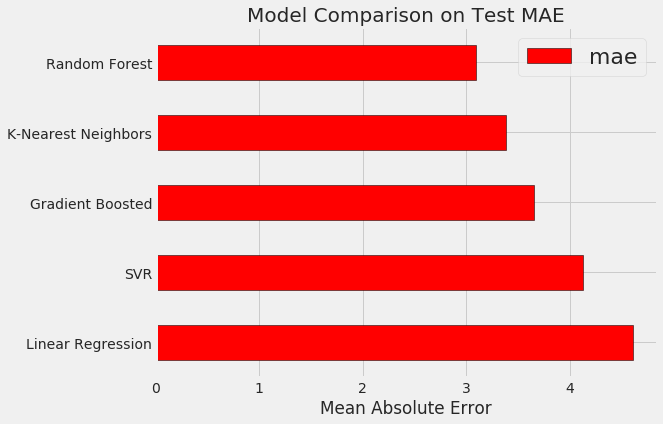

In [185]:
figsize(8, 6)

# Dataframe to hold the results
model_comparison = pd.DataFrame({'model': ['Linear Regression', "SVR",'Random Forest', 'Gradient Boosted',
                                            'K-Nearest Neighbors'],
                                 'mae': [lr_mae, svm_mae, random_forest_mae, 
                                         gradient_boosted_mae, knn_mae]})

# Horizontal bar chart of test mae
model_comparison.sort_values('mae', ascending = False).plot(x = 'model', y = 'mae', kind = 'barh',
                                                           color = 'red', edgecolor = 'black')

# Plot formatting
plt.ylabel(''); plt.yticks(size = 14); plt.xlabel('Mean Absolute Error'); plt.xticks(size = 14)
plt.title('Model Comparison on Test MAE', size = 20);

The best performing model is the Random Forest.

## Model Optimization
## Hyperparameter Tuning with Random Search and Cross Validation

## Random Forest

In [186]:
rf = RandomForestRegressor(random_state = 42)
from pprint import pprint
# Look at parameters used by our current forest
print('Parameters currently in use:\n')
pprint(rf.get_params())

Parameters currently in use:

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'criterion': 'mse',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 42,
 'verbose': 0,
 'warm_start': False}


In [187]:
# Number of trees used in the process
n_estimators=[100,200,300,400, 500, 600, 700, 800, 900, 1000, 1100,1200,1500]

# Maximum depth of each tree
max_depth = [2, 3, 5, 10, 15,20,30]

# Minimum number of samples per leaf
min_samples_leaf = [1, 2, 4, 6, 8,10]

# Minimum number of samples to split a node
min_samples_split = [2, 4, 6, 10,15,20]

# Maximum number of features to consider for making splits
max_features = ['auto', 'sqrt', 'log2', None]

# Method of selecting samples for training each tree
bootstrap = [True, False]

# Define the grid of hyperparameters to search
hyperparameter_grid = {'n_estimators': n_estimators,
                       'max_depth': max_depth,
                       'min_samples_leaf': min_samples_leaf,
                       'min_samples_split': min_samples_split,
                       'max_features': max_features,
                      'bootstrap': bootstrap}

In [188]:
# Create the model to use for hyperparameter tuning
rf_model = RandomForestRegressor(random_state = 42)

# Set up the random search with 4-fold cross validation
randomforest_cv = RandomizedSearchCV(estimator=rf_model,
                               param_distributions=hyperparameter_grid,
                               cv=4, n_iter=25, 
                               return_train_score=True,
                               n_jobs = -1, verbose = 2, 
                               random_state=42)

In [189]:
# Fit on the training data
randomforest_cv.fit(X, y)

Fitting 4 folds for each of 25 candidates, totalling 100 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed: 25.1min
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed: 71.3min finished


RandomizedSearchCV(cv=4, error_score=nan,
                   estimator=RandomForestRegressor(bootstrap=True,
                                                   ccp_alpha=0.0,
                                                   criterion='mse',
                                                   max_depth=None,
                                                   max_features='auto',
                                                   max_leaf_nodes=None,
                                                   max_samples=None,
                                                   min_impurity_decrease=0.0,
                                                   min_impurity_split=None,
                                                   min_samples_leaf=1,
                                                   min_samples_split=2,
                                                   min_weight_fraction_leaf=0.0,
                                                   n_estimators=100,
                              

### Best hyperparameters

In [190]:
randomforest_cv.best_estimator_

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=30, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=2,
                      min_samples_split=15, min_weight_fraction_leaf=0.0,
                      n_estimators=200, n_jobs=None, oob_score=False,
                      random_state=42, verbose=0, warm_start=False)

The best random forest model has the following hyperparameters:
- bootstrap=True,
- n_estimators=200,
- max_depth=30,
- min_samples_leaf=2,
- min_samples_split=15,
- max_features="auto"

We will use grid search with a grid that only has the n_estimators hyperparameter.

In [191]:
## Create a range of trees to evaluate
trees_grid = {'n_estimators': [100, 150, 200, 250, 300, 350, 400, 450, 500, 550, 600, 650, 700, 750, 800, 850, 900,1000,1100]}

model = RandomForestRegressor(bootstrap=True, max_depth = 30,
                                  min_samples_leaf = 2,
                                  min_samples_split = 15,
                                  max_features = 'auto',
                              criterion='mse',
                                  random_state = 42)

# Grid Search Object using the trees range and the random forest model
rf_grid_search = GridSearchCV(estimator = model, param_grid=trees_grid, cv = 4, 
                            verbose = 0,
                           n_jobs = None)

In [192]:
# Fit the grid search
rf_grid_search.fit(X, y)

GridSearchCV(cv=4, error_score=nan,
             estimator=RandomForestRegressor(bootstrap=True, ccp_alpha=0.0,
                                             criterion='mse', max_depth=30,
                                             max_features='auto',
                                             max_leaf_nodes=None,
                                             max_samples=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=2,
                                             min_samples_split=15,
                                             min_weight_fraction_leaf=0.0,
                                             n_estimators=100, n_jobs=None,
                                             oob_score=False, random_state=42,
                                             verbose=0, warm_start=False),
             iid='deprecated', n_jobs=

In [193]:
# Default model
rf_default_model = RandomForestRegressor(random_state = 42)

# Select the best model
rf_final_model = rf_grid_search.best_estimator_

rf_final_model

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=30, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=2,
                      min_samples_split=15, min_weight_fraction_leaf=0.0,
                      n_estimators=450, n_jobs=None, oob_score=False,
                      random_state=42, verbose=0, warm_start=False)

### Running Time

In [194]:
%%timeit -n 1 -r 5

# Default model
rf_default_model.fit(X, y)

47.5 s ± 1.89 s per loop (mean ± std. dev. of 5 runs, 1 loop each)


In [195]:
%%timeit -n 1 -r 5

# Tuned model
rf_final_model.fit(X, y)

2min 42s ± 5.58 s per loop (mean ± std. dev. of 5 runs, 1 loop each)


In [196]:
# Compare the performance of the default Random Forest Regressor to the tuned model: 

rf_default_pred = rf_default_model.predict(X_test)
rf_final_pred = rf_final_model.predict(X_test)

print('Default model performance on the test set: MAE = %0.4f.' % mae(y_test, rf_default_pred))
print('Final model performance on the test set:   MAE = %0.4f.' % mae(y_test, rf_final_pred))

Default model performance on the test set: MAE = 3.0960.
Final model performance on the test set:   MAE = 3.0245.


The MAE has been improved on the fitted model, but only by about 2.5% and at the cost of significantly longer runtime (it is about 3.5 times slower on my machine).

### MAPE Calculation

In [197]:
# Calculate the MAPE for the default model:
mape=100*(mae(y_test, rf_default_pred)/y_test)

accuracy=100-np.mean(mape)
print("Accuracy default model", round(accuracy,2), '%.')

Accuracy default model 90.93 %.


In [198]:
# Calculate the MAPE for the final model:
mape=100*(mae(y_test, rf_final_pred)/y_test)

accuracy=100-np.mean(mape)
print("Accuracy final model", round(accuracy,2), '%.')

Accuracy final model 91.14 %.


### Test Values and Predictions

<Figure size 576x432 with 0 Axes>

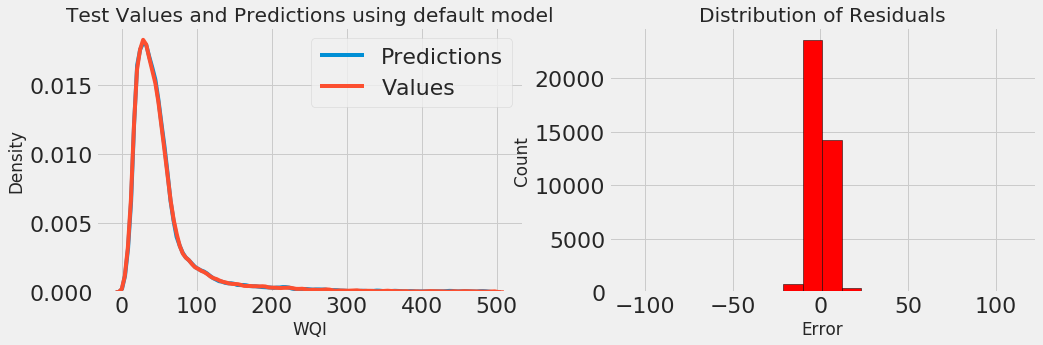

In [199]:
## Using default model

fig=plt.figure()
plt.figure(figsize=(15,10))

# Density plot of the final predictions and the test values
plt.subplot2grid((2,2), (0,0))
sns.kdeplot(rf_default_pred, label = 'Predictions')
sns.kdeplot(y_test, label = 'Values')
# Label the plot
plt.xlabel('WQI'); plt.ylabel('Density');
plt.title('Test Values and Predictions using default model');

# Calculate the residuals
plt.subplot2grid((2,2), (0,1))
default_residuals = rf_default_pred - y_test
# Plot the residuals in a histogram
plt.hist(default_residuals, color = 'red', bins = 20,
         edgecolor = 'black')
plt.xlabel('Error'); plt.ylabel('Count')
plt.title('Distribution of Residuals');

<Figure size 576x432 with 0 Axes>

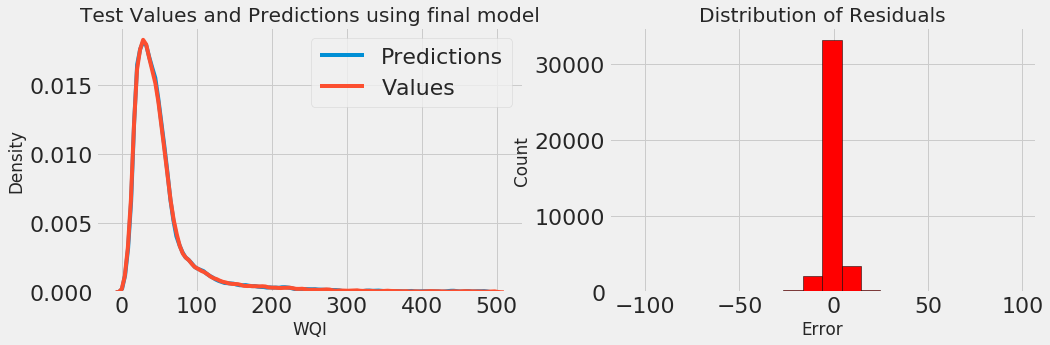

In [200]:
## Using final model

fig=plt.figure()
plt.figure(figsize=(15,10))

# Density plot of the final predictions and the test values
plt.subplot2grid((2,2), (0,0))
sns.kdeplot(rf_final_pred, label = 'Predictions')
sns.kdeplot(y_test, label = 'Values')
# Label the plot
plt.xlabel('WQI'); plt.ylabel('Density');
plt.title('Test Values and Predictions using final model');

# Calculate the residuals
plt.subplot2grid((2,2), (0,1))
final_residuals = rf_final_pred - y_test
# Plot the residuals in a histogram
plt.hist(final_residuals, color = 'red', bins = 20,
         edgecolor = 'black')
plt.xlabel('Error'); plt.ylabel('Count')
plt.title('Distribution of Residuals');

## Gradient Boosted

In [7]:
gb = GradientBoostingRegressor()
from pprint import pprint
# Look at parameters used by our current forest
print('Parameters currently in use:\n')
pprint(gb.get_params())

Parameters currently in use:

{'alpha': 0.9,
 'ccp_alpha': 0.0,
 'criterion': 'friedman_mse',
 'init': None,
 'learning_rate': 0.1,
 'loss': 'ls',
 'max_depth': 3,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_iter_no_change': None,
 'presort': 'deprecated',
 'random_state': None,
 'subsample': 1.0,
 'tol': 0.0001,
 'validation_fraction': 0.1,
 'verbose': 0,
 'warm_start': False}


In [8]:
# Loss function to be optimized
loss = ['ls', 'lad', 'huber']

# Number of trees used in the boosting process
n_estimators = [100, 500, 900, 1100, 1500]

# Maximum depth of each tree
max_depth = [2, 3, 5, 10, 15]

# Minimum number of samples per leaf
min_samples_leaf = [1, 2, 4, 6, 8]

# Minimum number of samples to split a node
min_samples_split = [2, 4, 6, 10]

# Maximum number of features to consider for making splits
max_features = ['auto', 'sqrt', 'log2', None]

# Define the grid of hyperparameters to search
hyperparameter_grid = {'loss': loss,
                       'n_estimators': n_estimators,
                       'max_depth': max_depth,
                       'min_samples_leaf': min_samples_leaf,
                       'min_samples_split': min_samples_split,
                       'max_features': max_features}

In [9]:
# Create the model to use for hyperparameter tuning
gb_model = GradientBoostingRegressor(random_state = 42)

# Set up the random search with 4-fold cross validation
gb_cv = RandomizedSearchCV(estimator=gb_model,
                               param_distributions=hyperparameter_grid,
                               cv=4, n_iter=25, 
                               scoring = 'neg_mean_absolute_error',
                               n_jobs = -1, verbose = 1, 
                               return_train_score = True,
                               random_state=42)

In [10]:
# Fit on the training data
gb_cv.fit(X, y)

Fitting 4 folds for each of 25 candidates, totalling 100 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed: 86.7min
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed: 137.2min finished


RandomizedSearchCV(cv=4, error_score=nan,
                   estimator=GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0,
                                                       criterion='friedman_mse',
                                                       init=None,
                                                       learning_rate=0.1,
                                                       loss='ls', max_depth=3,
                                                       max_features=None,
                                                       max_leaf_nodes=None,
                                                       min_impurity_decrease=0.0,
                                                       min_impurity_split=None,
                                                       min_samples_leaf=1,
                                                       min_samples_split=2,
                                                       min_weight_fraction_leaf=0.0,
                             

### Best hyperparameters

In [11]:
gb_cv.best_estimator_

GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0, criterion='friedman_mse',
                          init=None, learning_rate=0.1, loss='huber',
                          max_depth=10, max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=6, min_samples_split=10,
                          min_weight_fraction_leaf=0.0, n_estimators=1100,
                          n_iter_no_change=None, presort='deprecated',
                          random_state=42, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)

The best gradient boosted model has the following hyperparameters:
- loss="huber",
- n_estimators=1100,
- max_depth=10,
- min_samples_leaf=6,
- min_samples_split=10,
- max_features=None

We will use grid search with a grid that only has the n_estimators hyperparameter.

In [12]:
# Create a range of trees to evaluate
trees_grid = {'n_estimators': [100, 150, 200, 250, 300, 350, 400, 450, 500, 550, 600, 650, 700, 750, 800,900,1000,1100]}

gb_model = GradientBoostingRegressor(loss = 'huber', max_depth = 10,
                                  min_samples_leaf = 6,
                                  min_samples_split = 10,
                                  max_features = None,
                                  random_state = 42)

# Grid Search Object using the trees range and the random forest model
gb_grid_search = GridSearchCV(estimator = gb_model, param_grid=trees_grid, cv = 4, 
                           scoring = 'neg_mean_absolute_error', verbose = 1,
                           n_jobs = -1, return_train_score = True)

In [13]:
# Fit the grid search
gb_grid_search.fit(X, y)

Fitting 4 folds for each of 18 candidates, totalling 72 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed: 47.5min
[Parallel(n_jobs=-1)]: Done  72 out of  72 | elapsed: 114.7min finished


GridSearchCV(cv=4, error_score=nan,
             estimator=GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0,
                                                 criterion='friedman_mse',
                                                 init=None, learning_rate=0.1,
                                                 loss='huber', max_depth=10,
                                                 max_features=None,
                                                 max_leaf_nodes=None,
                                                 min_impurity_decrease=0.0,
                                                 min_impurity_split=None,
                                                 min_samples_leaf=6,
                                                 min_samples_split=10,
                                                 min_weight_fraction_leaf=0.0,
                                                 n_estimators=100,
                                                 n_i...e,
                          

In [14]:
# Default model
gb_default_model = GradientBoostingRegressor(random_state = 42)

# Select the best model
gb_final_model = gb_grid_search.best_estimator_

gb_final_model

GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0, criterion='friedman_mse',
                          init=None, learning_rate=0.1, loss='huber',
                          max_depth=10, max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=6, min_samples_split=10,
                          min_weight_fraction_leaf=0.0, n_estimators=550,
                          n_iter_no_change=None, presort='deprecated',
                          random_state=42, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)

### Running Time

In [15]:
%%timeit -n 1 -r 5

# Default model
gb_default_model.fit(X, y)

11 s ± 70.2 ms per loop (mean ± std. dev. of 5 runs, 1 loop each)


In [16]:
%%timeit -n 1 -r 5

# Tuned model
gb_final_model.fit(X, y)

4min 15s ± 461 ms per loop (mean ± std. dev. of 5 runs, 1 loop each)


In [17]:
# Compare the performance of the default Gradient Boosting Regressor to the tuned model: 

gb_default_pred = gb_default_model.predict(X_test)
gb_final_pred = gb_final_model.predict(X_test)

print('Default model performance on the test set: MAE = %0.4f.' % mae(y_test, gb_default_pred))
print('Final model performance on the test set:   MAE = %0.4f.' % mae(y_test, gb_final_pred))

Default model performance on the test set: MAE = 3.6533.
Final model performance on the test set:   MAE = 2.7006.


### MAPE Calculation

In [18]:
# Calculate the MAPE for the default model:
mape=100*(mae(y_test, gb_default_pred)/y_test)

accuracy=100-np.mean(mape)
print("Accuracy default model", round(accuracy,2), '%.')

# Calculate the MAPE for the final model:
mape=100*(mae(y_test, gb_final_pred)/y_test)

accuracy=100-np.mean(mape)
print("Accuracy final model", round(accuracy,2), '%.')

Accuracy default model 89.3 %.
Accuracy final model 92.09 %.


### Test Values and Predictions

<Figure size 432x288 with 0 Axes>

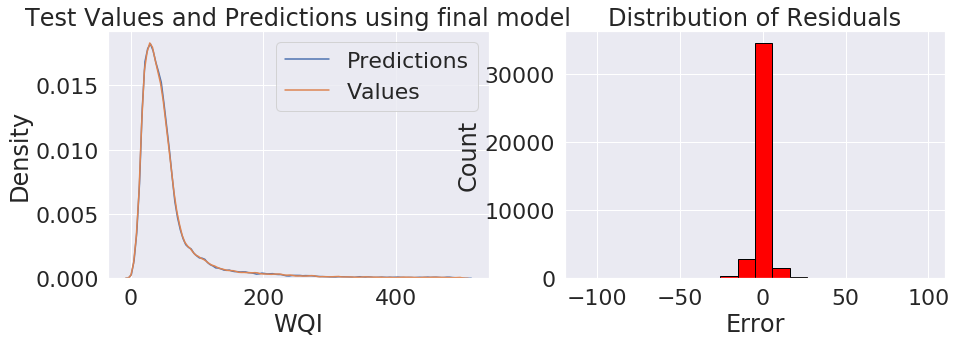

In [19]:
## Using final model

fig=plt.figure()
plt.figure(figsize=(15,10))

# Density plot of the final predictions and the test values
plt.subplot2grid((2,2), (0,0))
sns.kdeplot(gb_final_pred, label = 'Predictions')
sns.kdeplot(y_test, label = 'Values')
# Label the plot
plt.xlabel('WQI'); plt.ylabel('Density');
plt.title('Test Values and Predictions using final model');

# Calculate the residuals
plt.subplot2grid((2,2), (0,1))
final_residuals = gb_final_pred - y_test
# Plot the residuals in a histogram
plt.hist(final_residuals, color = 'red', bins = 20,
         edgecolor = 'black')
plt.xlabel('Error'); plt.ylabel('Count')
plt.title('Distribution of Residuals');

## Linear Regression

In [20]:
lr=LinearRegression()
# Look at parameters used by our current forest
print('Parameters currently in use:\n')
pprint(lr.get_params())

Parameters currently in use:

{'copy_X': True, 'fit_intercept': True, 'n_jobs': None, 'normalize': False}


In [21]:
%%timeit -n 1 -r 5

#Fit on the training data
lr.fit(X,y)

The slowest run took 8.82 times longer than the fastest. This could mean that an intermediate result is being cached.
29.6 ms ± 36.1 ms per loop (mean ± std. dev. of 5 runs, 1 loop each)


In [22]:
lr_pred=lr.predict(X_test)

print("Linear Regression Full Results: MAE= %0.4f." %mae(y_test, lr_pred))

Linear Regression Full Results: MAE= 4.6112.


In [24]:
predicted = lr.predict(X_test)
r2_value = lr.score(X, y)
rmsd = np.sqrt(mae(y_test, predicted))
print("Slope(b1): \n", lr.coef_)
print("Y Intercept(b0): \n", lr.intercept_)
print("Root Mean Square Deviation: \n", rmsd)
print("R^2 value: \n", r2_value)
print("Prediction over test data: \n", predicted)

Slope(b1): 
 [587.62970112  24.67375477  12.31878958]
Y Intercept(b0): 
 -16.802696202797208
Root Mean Square Deviation: 
 2.147374252187906
R^2 value: 
 0.9821683581890156
Prediction over test data: 
 [56.18154086 66.59593013 40.10589676 ... 24.91415711 28.64248149
 35.61673937]


### Test Values and Predictions

<Figure size 432x288 with 0 Axes>

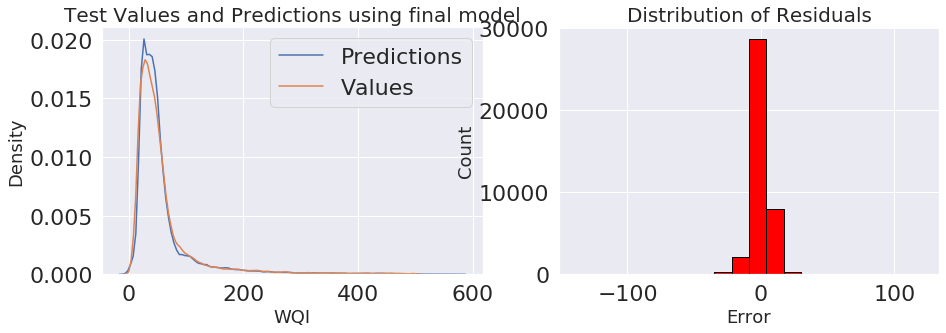

In [41]:
## Using final model

fig=plt.figure()
plt.figure(figsize=(15,10))

# Density plot of the final predictions and the test values
plt.subplot2grid((2,2), (0,0))
sns.kdeplot(lr_pred, label = 'Predictions')
sns.kdeplot(y_test, label = 'Values')
# Label the plot
plt.xlabel('WQI', size=18); plt.ylabel('Density', size=18);
plt.title('Test Values and Predictions using final model', size=20);

# Calculate the residuals
plt.subplot2grid((2,2), (0,1))
final_residuals = lr_pred - y_test
# Plot the residuals in a histogram
plt.hist(final_residuals, color = 'red', bins = 20,
         edgecolor = 'black')
plt.xlabel('Error', size=18); plt.ylabel('Count', size=18)
plt.title('Distribution of Residuals', size=20);

### MAPE Calculation

In [42]:
mape=100*(mae(y_test, lr_pred)/y_test)

accuracy=100-np.mean(mape)
print("Accuracy final model", round(accuracy,2), '%.')

Accuracy final model 86.49 %.


## K-Nearest Neighbors

In [43]:
knn = KNeighborsRegressor()
# Look at parameters used by our current forest
print('Parameters currently in use:\n')
pprint(knn.get_params())

Parameters currently in use:

{'algorithm': 'auto',
 'leaf_size': 30,
 'metric': 'minkowski',
 'metric_params': None,
 'n_jobs': None,
 'n_neighbors': 5,
 'p': 2,
 'weights': 'uniform'}


In [44]:
# Number of neighbors used in the process
n_neighbors=[2,3,4,5,10,15,20,30]
hyperparameter_grid={'n_neighbors':n_neighbors}

In [45]:
# Create the model to use for hyperparameter tuning
knn_model=KNeighborsRegressor()

# Set up the random search with 4-fold cross validation
knn_cv=RandomizedSearchCV(estimator=knn_model, 
                          param_distributions=hyperparameter_grid,
                         cv=4, n_iter=25, 
                               scoring = 'neg_mean_absolute_error',
                               n_jobs = -1, verbose = 1, 
                               return_train_score = True,
                               random_state=42)

In [46]:
# Fit on the training data
knn_cv.fit(X,y)

Fitting 4 folds for each of 8 candidates, totalling 32 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  32 out of  32 | elapsed:  1.0min finished


RandomizedSearchCV(cv=4, error_score=nan,
                   estimator=KNeighborsRegressor(algorithm='auto', leaf_size=30,
                                                 metric='minkowski',
                                                 metric_params=None,
                                                 n_jobs=None, n_neighbors=5,
                                                 p=2, weights='uniform'),
                   iid='deprecated', n_iter=25, n_jobs=-1,
                   param_distributions={'n_neighbors': [2, 3, 4, 5, 10, 15, 20,
                                                        30]},
                   pre_dispatch='2*n_jobs', random_state=42, refit=True,
                   return_train_score=True, scoring='neg_mean_absolute_error',
                   verbose=1)

### Best hyperparameters

In [47]:
knn_cv.best_estimator_

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=10, p=2,
                    weights='uniform')

In [48]:
knn_model=KNeighborsRegressor(algorithm='auto', n_jobs=None,
                             n_neighbors=10, metric='minkowski')
trees_grid={"n_neighbors": [2,3,4,5,10,15,20]}
knn_grid_search=GridSearchCV(estimator=knn_model, param_grid=trees_grid, cv=4,
                            verbose=0,
                            n_jobs=None)

In [49]:
# Fit the grid search
knn_grid_search.fit(X,y)

GridSearchCV(cv=4, error_score=nan,
             estimator=KNeighborsRegressor(algorithm='auto', leaf_size=30,
                                           metric='minkowski',
                                           metric_params=None, n_jobs=None,
                                           n_neighbors=10, p=2,
                                           weights='uniform'),
             iid='deprecated', n_jobs=None,
             param_grid={'n_neighbors': [2, 3, 4, 5, 10, 15, 20]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [50]:
# Default model
knn_default_model = KNeighborsRegressor()

# Select the best model
knn_final_model = knn_grid_search.best_estimator_

knn_final_model

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=10, p=2,
                    weights='uniform')

### Running Time

In [51]:
%%timeit -n 1 -r 5

# Default model
knn_default_model.fit(X, y)

213 ms ± 13 ms per loop (mean ± std. dev. of 5 runs, 1 loop each)


In [52]:
%%timeit -n 1 -r 5

# Tuned model
knn_final_model.fit(X, y)

239 ms ± 43.3 ms per loop (mean ± std. dev. of 5 runs, 1 loop each)


In [53]:
# Compare the performance of the default KNN-Neighbors Regressor to the tuned model: 

knn_default_pred = knn_default_model.predict(X_test)
knn_final_pred = knn_final_model.predict(X_test)

print('Default model performance on the test set: MAE = %0.4f.' % mae(y_test, knn_default_pred))
print('Final model performance on the test set:   MAE = %0.4f.' % mae(y_test, knn_final_pred))

Default model performance on the test set: MAE = 3.4475.
Final model performance on the test set:   MAE = 3.3872.


### MAPE Calculation

In [54]:
# Calculate the MAPE for the default model:
mape=100*(mae(y_test, knn_default_pred)/y_test)

accuracy=100-np.mean(mape)
print("Accuracy default model", round(accuracy,2), '%.')
# Calculate the MAPE for the final model:
mape=100*(mae(y_test, knn_final_pred)/y_test)

accuracy=100-np.mean(mape)
print("Accuracy final model", round(accuracy,2), '%.')

Accuracy default model 89.9 %.
Accuracy final model 90.08 %.


### Test Values and Predictions

<Figure size 432x288 with 0 Axes>

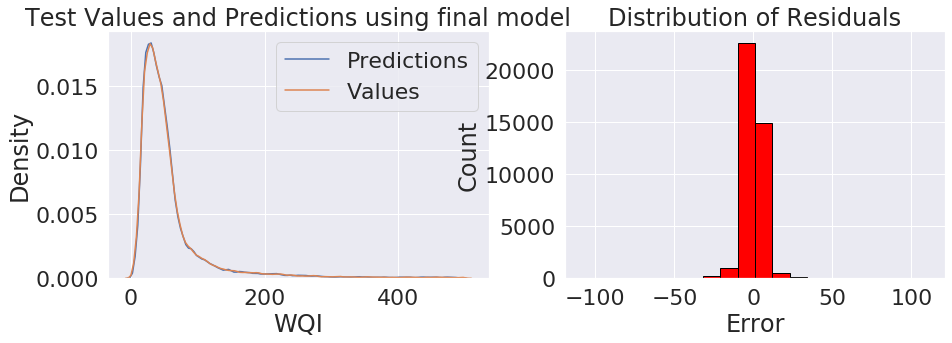

In [55]:
fig=plt.figure()
plt.figure(figsize=(15,10))

# Density plot of the final predictions and the test values
plt.subplot2grid((2,2), (0,0))
sns.kdeplot(knn_final_pred, label = 'Predictions')
sns.kdeplot(y_test, label = 'Values')
# Label the plot
plt.xlabel('WQI'); plt.ylabel('Density');
plt.title('Test Values and Predictions using final model');

# Calculate the residuals
plt.subplot2grid((2,2), (0,1))
final_residuals = knn_final_pred - y_test
# Plot the residuals in a histogram
plt.hist(final_residuals, color = 'red', bins = 20,
         edgecolor = 'black')
plt.xlabel('Error'); plt.ylabel('Count')
plt.title('Distribution of Residuals');

## Support Vector Machine Regression

In [56]:
svr=SVR()
# Look at parameters used by our current forest
print('Parameters currently in use:\n')
pprint(svr.get_params())

Parameters currently in use:

{'C': 1.0,
 'cache_size': 200,
 'coef0': 0.0,
 'degree': 3,
 'epsilon': 0.1,
 'gamma': 'scale',
 'kernel': 'rbf',
 'max_iter': -1,
 'shrinking': True,
 'tol': 0.001,
 'verbose': False}


In [57]:
# Regularization parameter
C=[1.0,10,50,100,200,300,400,500,600,700,800,900,1000]
hyperparameter_grid={'C':C}

# Create the model to use for hyperparameter tuning
svr_model=SVR()

# Set up the random search with 4-fold cross validation
svr_cv=RandomizedSearchCV(estimator=svr_model,
                               param_distributions=hyperparameter_grid,
                               cv=4, n_iter=25, 
                               return_train_score=True,
                               n_jobs = -1, verbose = 2, 
                               random_state=42)

In [58]:
# Fit on the training data
svr_cv.fit(X, y)

Fitting 4 folds for each of 13 candidates, totalling 52 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed: 398.4min
[Parallel(n_jobs=-1)]: Done  52 out of  52 | elapsed: 610.2min finished


RandomizedSearchCV(cv=4, error_score=nan,
                   estimator=SVR(C=1.0, cache_size=200, coef0=0.0, degree=3,
                                 epsilon=0.1, gamma='scale', kernel='rbf',
                                 max_iter=-1, shrinking=True, tol=0.001,
                                 verbose=False),
                   iid='deprecated', n_iter=25, n_jobs=-1,
                   param_distributions={'C': [1.0, 10, 50, 100, 200, 300, 400,
                                              500, 600, 700, 800, 900, 1000]},
                   pre_dispatch='2*n_jobs', random_state=42, refit=True,
                   return_train_score=True, scoring=None, verbose=2)

### Best hyperparameters

In [59]:
svr_cv.best_estimator_

SVR(C=1000, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='scale',
    kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

In [7]:
## Create a range 
trees_grid = {'C': [1.0,10,50,100,200,300,400,500,600,700,800,900,1000]}
svr_model = SVR()

# Grid Search Object using the trees range and the random forest model
svr_grid_search = GridSearchCV(estimator = svr_model, param_grid=trees_grid, cv = 4, 
                            verbose = 2,
                           n_jobs = -1)

In [8]:
# Fit the grid search
svr_grid_search.fit(X,y)

Fitting 4 folds for each of 13 candidates, totalling 52 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed: 282.3min
[Parallel(n_jobs=-1)]: Done  52 out of  52 | elapsed: 463.3min finished


GridSearchCV(cv=4, error_score=nan,
             estimator=SVR(C=1.0, cache_size=200, coef0=0.0, degree=3,
                           epsilon=0.1, gamma='scale', kernel='rbf',
                           max_iter=-1, shrinking=True, tol=0.001,
                           verbose=False),
             iid='deprecated', n_jobs=-1,
             param_grid={'C': [1.0, 10, 50, 100, 200, 300, 400, 500, 600, 700,
                               800, 900, 1000]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=2)

In [9]:
# Default model
svr_default_model = SVR(C = 1000, gamma = 0.1)

# Select the best model
svr_final_model = svr_grid_search.best_estimator_

svr_final_model

SVR(C=1000, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='scale',
    kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

### Running Time

In [10]:
%%timeit -n 1 -r 5

# default model
svr_default_model.fit(X, y)

28min 43s ± 3.56 s per loop (mean ± std. dev. of 5 runs, 1 loop each)


In [11]:
%%timeit -n 1 -r 5

# tuned model
svr_final_model.fit(X, y)

48min 1s ± 6.43 s per loop (mean ± std. dev. of 5 runs, 1 loop each)


In [12]:
svr_default_pred = svr_default_model.predict(X_test)
svr_final_pred = svr_final_model.predict(X_test)

print('Rendimiento del modelo predeterminado en el conjunto de prueba: MAE = %0.4f.' % mae(y_test, svr_default_pred))
print('Rendimiento final del modelo en el conjunto de prueba:   MAE = %0.4f.' % mae(y_test, svr_final_pred))

Rendimiento del modelo predeterminado en el conjunto de prueba: MAE = 4.1336.
Rendimiento final del modelo en el conjunto de prueba:   MAE = 3.7406.


### Test Values and Predictions

<Figure size 432x288 with 0 Axes>

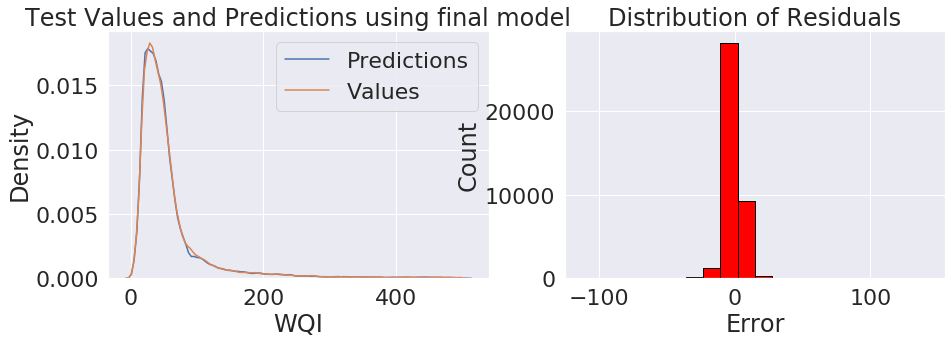

In [13]:
## Using final model

fig=plt.figure()
plt.figure(figsize=(15,10))

# Density plot of the final predictions and the test values
plt.subplot2grid((2,2), (0,0))
sns.kdeplot(svr_final_pred, label = 'Predictions')
sns.kdeplot(y_test, label = 'Values')
# Label the plot
plt.xlabel('WQI'); plt.ylabel('Density');
plt.title('Test Values and Predictions using final model');

# Calculate the residuals
plt.subplot2grid((2,2), (0,1))
final_residuals = svr_final_pred - y_test
# Plot the residuals in a histogram
plt.hist(final_residuals, color = 'red', bins = 20,
         edgecolor = 'black')
plt.xlabel('Error'); plt.ylabel('Count')
plt.title('Distribution of Residuals');

### MAPE Calculation

In [14]:
# Calculate the MAPE for the default model:
mape=100*(mae(y_test, svr_default_pred)/y_test)

accuracy=100-np.mean(mape)
print("Accuracy default model", round(accuracy,2), '%.')
# Calculate the MAPE for the final model:
mape=100*(mae(y_test, svr_final_pred)/y_test)

accuracy=100-np.mean(mape)
print("Accuracy final model", round(accuracy,2), '%.')

Accuracy default model 87.89 %.
Accuracy final model 89.04 %.


# Feature: Electrical Conductivity

I will only use electrical conductivity as an input variable. It has been the most important characteristic by far, it is possible that good models can be obtained using only this variable.

In [19]:
# Feature: electrical conductivity
feature_EC=chemical_stations[['EC (μS/cm)', "WQI"]]
no_wqi1 = feature_EC[feature_EC['WQI'].isna()]
wqi1 = feature_EC[feature_EC['WQI'].notnull()]

print(no_wqi1.shape)
print(wqi1.shape)

(0, 2)
(197135, 2)


In [20]:
# Separate out the features and targets
feature_EC=wqi1.drop(columns="WQI")
target_EC = pd.DataFrame(wqi1['WQI'])

# Split into 80% training and 20% testing set
X_EC, X_test_EC, y_EC, y_test_EC = train_test_split(feature_EC, target_EC, test_size = 0.2, random_state = 42)

print(X_EC.shape)
print(X_test_EC.shape)
print(y_EC.shape)
print(y_test_EC.shape)

(157708, 1)
(39427, 1)
(157708, 1)
(39427, 1)


### Scaling Features

In [26]:
# Create the scaler object with a range of 0-1
scaler = MinMaxScaler(feature_range=(0, 1))

# Fit on the training data
scaler.fit(X_EC)

# Transform both the training and testing data
X_EC = scaler.transform(X_EC)
X_test_EC = scaler.transform(X_test_EC)

# Convert y to one-dimensional array (vector)
y_EC = np.array(y_EC).reshape((-1, ))
y_test_EC = np.array(y_test_EC).reshape((-1, ))

## Linear Regression

In [21]:
lr=LinearRegression()

#Fit on full set of features
lr.fit(X,y)
lr_pred=lr.predict(X_test)

#Fit with only electrical conductivity
lr.fit(X_EC,y_EC)
lr_pred_EC=lr.predict(X_test_EC)

print("Linear Regression Full Results: MAE= %0.4f." %mae(y_test, lr_pred))
print("Linear Regression with only EC Results: MAE= %0.4f." %mae(y_test_EC, lr_pred_EC))

Linear Regression Full Results: MAE= 4.6112.
Linear Regression with only EC Results: MAE= 5.0711.


In [22]:
%%timeit -n 1 -r 5

# All features
lr.fit(X,y)

11.1 ms ± 1.09 ms per loop (mean ± std. dev. of 5 runs, 1 loop each)


In [23]:
%%timeit -n 1 -r 5

# Only electrical conductivity
lr.fit(X_EC,y_EC)

6.74 ms ± 940 µs per loop (mean ± std. dev. of 5 runs, 1 loop each)


Using only electrical conductivity as a variable does not improve the results of linear regression. Thus, low-importance features provide information that actually improves performance.

On the other hand, the execution time using only the EC improves, but the absolute magnitude of the training time is not significant.

In [24]:
predicted = lr.predict(X_test_EC)
r2_value = lr.score(X_EC, y_EC)
rmsd = np.sqrt(mae(y_test_EC, predicted))
print("Slope(b1): \n", lr.coef_)
print("Y Intercept(b0): \n", lr.intercept_)
print("Root Mean Square Deviation: \n", rmsd)
print("R^2 value: \n", r2_value)
print("Prediction over test data: \n", predicted)

Slope(b1): 
 [[0.05912926]]
Y Intercept(b0): 
 [8.40160024]
Root Mean Square Deviation: 
 WQI    2.251911
dtype: float64
R^2 value: 
 0.979253351549942
Prediction over test data: 
 [[52.27551288]
 [64.27875313]
 [37.43406804]
 ...
 [25.66734484]
 [26.14037894]
 [33.59066599]]


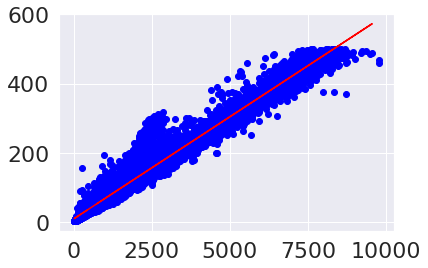

In [25]:
plt.scatter(X_EC,y_EC, color="blue")
plt.plot(X_test_EC,predicted, color="red")
plt.show()

## Random Forest

In [28]:
rf = RandomForestRegressor(random_state = 42)
from pprint import pprint
# Look at parameters used by our current forest
print('Parameters currently in use:\n')
pprint(rf.get_params())

Parameters currently in use:

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'criterion': 'mse',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 42,
 'verbose': 0,
 'warm_start': False}


In [29]:
# Number of trees used in the process
n_estimators=[100,200,300,400, 500, 600, 700, 800, 900, 1000, 1100,1200,1500]

# Maximum depth of each tree
max_depth = [2, 3, 5, 10, 15,20,30]

# Minimum number of samples per leaf
min_samples_leaf = [1, 2, 4, 6, 8,10]

# Minimum number of samples to split a node
min_samples_split = [2, 4, 6, 10,15,20]

# Maximum number of features to consider for making splits
max_features = ['auto', 'sqrt', 'log2', None]

# Method of selecting samples for training each tree
bootstrap = [True, False]

# Define the grid of hyperparameters to search
hyperparameter_grid = {'n_estimators': n_estimators,
                       'max_depth': max_depth,
                       'min_samples_leaf': min_samples_leaf,
                       'min_samples_split': min_samples_split,
                       'max_features': max_features,
                      'bootstrap': bootstrap}

In [30]:
# Create the model to use for hyperparameter tuning
rf_model = RandomForestRegressor(random_state = 42)

# Set up the random search with 4-fold cross validation
randomforest_cv = RandomizedSearchCV(estimator=rf_model,
                               param_distributions=hyperparameter_grid,
                               cv=4, n_iter=25, 
                               return_train_score=True,
                               n_jobs = -1, verbose = 2, 
                               random_state=42)

In [31]:
# Fit on the training data
randomforest_cv.fit(X_EC, y_EC)

Fitting 4 folds for each of 25 candidates, totalling 100 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed: 19.5min
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed: 47.1min finished


RandomizedSearchCV(cv=4, error_score=nan,
                   estimator=RandomForestRegressor(bootstrap=True,
                                                   ccp_alpha=0.0,
                                                   criterion='mse',
                                                   max_depth=None,
                                                   max_features='auto',
                                                   max_leaf_nodes=None,
                                                   max_samples=None,
                                                   min_impurity_decrease=0.0,
                                                   min_impurity_split=None,
                                                   min_samples_leaf=1,
                                                   min_samples_split=2,
                                                   min_weight_fraction_leaf=0.0,
                                                   n_estimators=100,
                              

### Best hyperparameters

In [32]:
randomforest_cv.best_estimator_

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=10, max_features='sqrt', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=8,
                      min_samples_split=4, min_weight_fraction_leaf=0.0,
                      n_estimators=1200, n_jobs=None, oob_score=False,
                      random_state=42, verbose=0, warm_start=False)

The best random forest model has the following hyperparameters:
- bootstrap=True,
- n_estimators=1200,
- max_depth=10,
- min_samples_leaf=8,
- min_samples_split=4,
- max_features="sqrt"

We will use grid search with a grid that only has the n_estimators hyperparameter.

In [33]:
## Create a range of trees to evaluate
trees_grid = {'n_estimators': [100, 150, 200, 250, 300, 350, 400, 450, 500, 550, 600, 650, 700, 750, 800, 850, 900,1000,1100,1200]}

model = RandomForestRegressor(bootstrap=True, max_depth = 10,
                                  min_samples_leaf = 8,
                                  min_samples_split = 4,
                                  max_features = 'sqrt',
                              criterion='mse',
                                  random_state = 42)

# Grid Search Object using the trees range and the random forest model
rf_grid_search = GridSearchCV(estimator = model, param_grid=trees_grid, cv = 4, 
                            verbose = 1,
                           n_jobs = -1)

In [34]:
# Fit the grid search
rf_grid_search.fit(X_EC, y_EC)

Fitting 4 folds for each of 20 candidates, totalling 80 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed: 10.3min
[Parallel(n_jobs=-1)]: Done  80 out of  80 | elapsed: 32.3min finished


GridSearchCV(cv=4, error_score=nan,
             estimator=RandomForestRegressor(bootstrap=True, ccp_alpha=0.0,
                                             criterion='mse', max_depth=10,
                                             max_features='sqrt',
                                             max_leaf_nodes=None,
                                             max_samples=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=8,
                                             min_samples_split=4,
                                             min_weight_fraction_leaf=0.0,
                                             n_estimators=100, n_jobs=None,
                                             oob_score=False, random_state=42,
                                             verbose=0, warm_start=False),
             iid='deprecated', n_jobs=-

In [35]:
# Default model
rf_default_model = RandomForestRegressor(random_state = 42)

# Select the best model
rf_final_model = rf_grid_search.best_estimator_

rf_final_model

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=10, max_features='sqrt', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=8,
                      min_samples_split=4, min_weight_fraction_leaf=0.0,
                      n_estimators=1100, n_jobs=None, oob_score=False,
                      random_state=42, verbose=0, warm_start=False)

### Running Time

In [37]:
%%timeit -n 1 -r 5

# Default model
rf_default_model.fit(X_EC, y_EC)

13.5 s ± 156 ms per loop (mean ± std. dev. of 5 runs, 1 loop each)


In [38]:
%%timeit -n 1 -r 5

# Tuned model
rf_final_model.fit(X_EC, y_EC)

2min 11s ± 3.37 s per loop (mean ± std. dev. of 5 runs, 1 loop each)


In [39]:
# Compare the performance of the default Random Forest Regressor to the tuned model: 

rf_default_pred = rf_default_model.predict(X_test_EC)
rf_final_pred = rf_final_model.predict(X_test_EC)

print('Default model performance on the test set: MAE = %0.4f.' % mae(y_test, rf_default_pred))
print('Final model performance on the test set:   MAE = %0.4f.' % mae(y_test, rf_final_pred))

Default model performance on the test set: MAE = 4.7301.
Final model performance on the test set:   MAE = 4.6238.


### MAPE Calculation

In [40]:
# Calculate the MAPE for the default model:
mape=100*(mae(y_test, rf_default_pred)/y_test)

accuracy=100-np.mean(mape)
print("Accuracy default model", round(accuracy,2), '%.')

# Calculate the MAPE for the final model:
mape=100*(mae(y_test, rf_final_pred)/y_test)

accuracy=100-np.mean(mape)
print("Accuracy final model", round(accuracy,2), '%.')

Accuracy default model 86.14 %.
Accuracy final model 86.45 %.


### Test Values and Predictions

<Figure size 432x288 with 0 Axes>

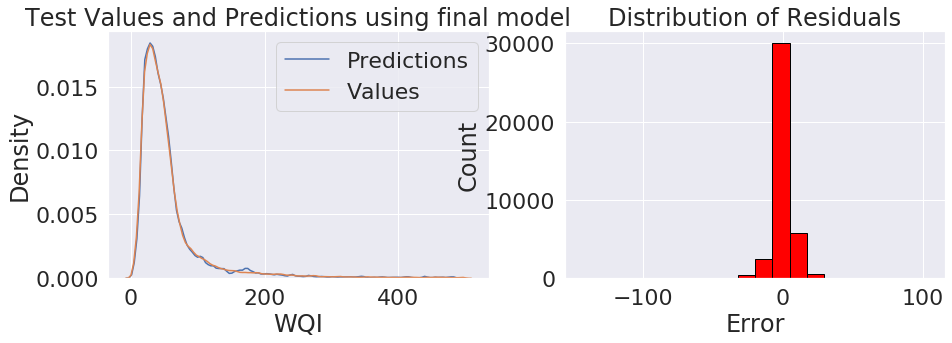

In [41]:
fig=plt.figure()
plt.figure(figsize=(15,10))

# Density plot of the final predictions and the test values
plt.subplot2grid((2,2), (0,0))
sns.kdeplot(rf_final_pred, label = 'Predictions')
sns.kdeplot(y_test, label = 'Values')
# Label the plot
plt.xlabel('WQI'); plt.ylabel('Density');
plt.title('Test Values and Predictions using final model');

# Calculate the residuals
plt.subplot2grid((2,2), (0,1))
final_residuals = rf_final_pred - y_test
# Plot the residuals in a histogram
plt.hist(final_residuals, color = 'red', bins = 20,
         edgecolor = 'black')
plt.xlabel('Error'); plt.ylabel('Count')
plt.title('Distribution of Residuals');

## Gradient Boosted

In [42]:
gb = GradientBoostingRegressor()
from pprint import pprint
# Look at parameters used by our current forest
print('Parameters currently in use:\n')
pprint(gb.get_params())

Parameters currently in use:

{'alpha': 0.9,
 'ccp_alpha': 0.0,
 'criterion': 'friedman_mse',
 'init': None,
 'learning_rate': 0.1,
 'loss': 'ls',
 'max_depth': 3,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_iter_no_change': None,
 'presort': 'deprecated',
 'random_state': None,
 'subsample': 1.0,
 'tol': 0.0001,
 'validation_fraction': 0.1,
 'verbose': 0,
 'warm_start': False}


In [43]:
# Loss function to be optimized
loss = ['ls', 'lad', 'huber']

# Number of trees used in the boosting process
n_estimators = [100, 500, 900, 1100, 1500]

# Maximum depth of each tree
max_depth = [2, 3, 5, 10, 15]

# Minimum number of samples per leaf
min_samples_leaf = [1, 2, 4, 6, 8]

# Minimum number of samples to split a node
min_samples_split = [2, 4, 6, 10]

# Maximum number of features to consider for making splits
max_features = ['auto', 'sqrt', 'log2', None]

# Define the grid of hyperparameters to search
hyperparameter_grid = {'loss': loss,
                       'n_estimators': n_estimators,
                       'max_depth': max_depth,
                       'min_samples_leaf': min_samples_leaf,
                       'min_samples_split': min_samples_split,
                       'max_features': max_features}

In [44]:
# Create the model to use for hyperparameter tuning
gb_model = GradientBoostingRegressor(random_state = 42)

# Set up the random search with 4-fold cross validation
gb_cv = RandomizedSearchCV(estimator=gb_model,
                               param_distributions=hyperparameter_grid,
                               cv=4, n_iter=25, 
                               scoring = 'neg_mean_absolute_error',
                               n_jobs = -1, verbose = 1, 
                               return_train_score = True,
                               random_state=42)

In [45]:
# Fit on the training data
gb_cv.fit(X_EC, y_EC)

Fitting 4 folds for each of 25 candidates, totalling 100 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed: 63.6min
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed: 110.5min finished


RandomizedSearchCV(cv=4, error_score=nan,
                   estimator=GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0,
                                                       criterion='friedman_mse',
                                                       init=None,
                                                       learning_rate=0.1,
                                                       loss='ls', max_depth=3,
                                                       max_features=None,
                                                       max_leaf_nodes=None,
                                                       min_impurity_decrease=0.0,
                                                       min_impurity_split=None,
                                                       min_samples_leaf=1,
                                                       min_samples_split=2,
                                                       min_weight_fraction_leaf=0.0,
                             

### Best hyperparameters

In [46]:
gb_cv.best_estimator_

GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0, criterion='friedman_mse',
                          init=None, learning_rate=0.1, loss='lad', max_depth=5,
                          max_features='log2', max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=8, min_samples_split=6,
                          min_weight_fraction_leaf=0.0, n_estimators=900,
                          n_iter_no_change=None, presort='deprecated',
                          random_state=42, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)

The best gradient boosted model has the following hyperparameters:
- loss="lad",
- n_estimators=900,
- max_depth=5,
- min_samples_leaf=8,
- min_samples_split=6,
- max_features="log2"

We will use grid search with a grid that only has the n_estimators hyperparameter.

In [47]:
# Create a range of trees to evaluate
trees_grid = {'n_estimators': [100, 150, 200, 250, 300, 350, 400, 450, 500, 550, 600, 650, 700, 750, 800,900,1000,1100]}

gb_model = GradientBoostingRegressor(loss = 'lad', max_depth = 5,
                                  min_samples_leaf = 8,
                                  min_samples_split = 6,
                                  max_features = "log2",
                                  random_state = 42)

# Grid Search Object using the trees range and the random forest model
gb_grid_search = GridSearchCV(estimator = gb_model, param_grid=trees_grid, cv = 4, 
                           scoring = 'neg_mean_absolute_error', verbose = 1,
                           n_jobs = -1, return_train_score = True)

In [48]:
# Fit the grid search
gb_grid_search.fit(X_EC, y_EC)

Fitting 4 folds for each of 18 candidates, totalling 72 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed: 13.9min
[Parallel(n_jobs=-1)]: Done  72 out of  72 | elapsed: 35.0min finished


GridSearchCV(cv=4, error_score=nan,
             estimator=GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0,
                                                 criterion='friedman_mse',
                                                 init=None, learning_rate=0.1,
                                                 loss='lad', max_depth=5,
                                                 max_features='log2',
                                                 max_leaf_nodes=None,
                                                 min_impurity_decrease=0.0,
                                                 min_impurity_split=None,
                                                 min_samples_leaf=8,
                                                 min_samples_split=6,
                                                 min_weight_fraction_leaf=0.0,
                                                 n_estimators=100,
                                                 n_ite...e,
                          

In [49]:
# Default model
gb_default_model = GradientBoostingRegressor(random_state = 42)

# Select the best model
gb_final_model = gb_grid_search.best_estimator_

gb_final_model

GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0, criterion='friedman_mse',
                          init=None, learning_rate=0.1, loss='lad', max_depth=5,
                          max_features='log2', max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=8, min_samples_split=6,
                          min_weight_fraction_leaf=0.0, n_estimators=300,
                          n_iter_no_change=None, presort='deprecated',
                          random_state=42, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)

### Running Time

In [50]:
%%timeit -n 1 -r 5

# Default model
gb_default_model.fit(X, y)

12.1 s ± 478 ms per loop (mean ± std. dev. of 5 runs, 1 loop each)


In [51]:
%%timeit -n 1 -r 5

# Tuned model
gb_final_model.fit(X, y)

36.4 s ± 421 ms per loop (mean ± std. dev. of 5 runs, 1 loop each)


In [65]:
# Compare the performance of the default Gradient Boosting Regressor to the tuned model: 

gb_default_pred = gb_default_model.predict(X_test)
gb_final_pred = gb_final_model.predict(X_test)

print('Default model performance on the test set: MAE = %0.4f.' % mae(y_test_EC, gb_default_pred))
print('Final model performance on the test set:   MAE = %0.4f.' % mae(y_test_EC, gb_final_pred))

Default model performance on the test set: MAE = 3.6533.
Final model performance on the test set:   MAE = 3.4962.


### MAPE Calculation

In [53]:
# Calculate the MAPE for the default model:
mape=100*(mae(y_test, gb_default_pred)/y_test)

accuracy=100-np.mean(mape)
print("Accuracy default model", round(accuracy,2), '%.')

# Calculate the MAPE for the final model:
mape=100*(mae(y_test, gb_final_pred)/y_test)

accuracy=100-np.mean(mape)
print("Accuracy final model", round(accuracy,2), '%.')

Accuracy default model 89.3 %.
Accuracy final model 89.76 %.


### Test Values and Predictions

<Figure size 432x288 with 0 Axes>

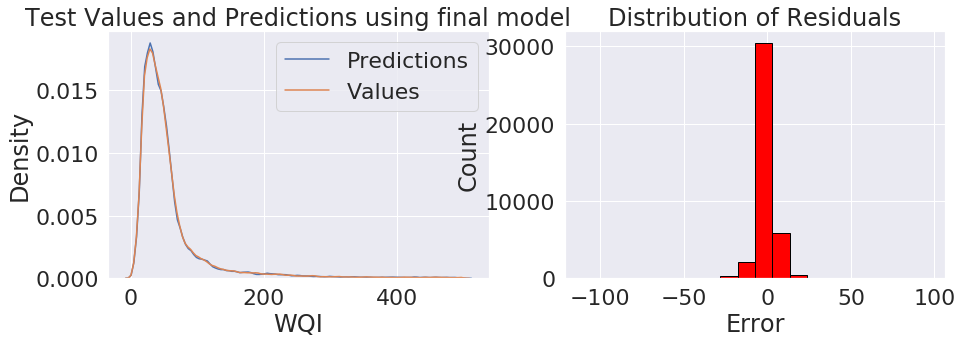

In [54]:
fig=plt.figure()
plt.figure(figsize=(15,10))

# Density plot of the final predictions and the test values
plt.subplot2grid((2,2), (0,0))
sns.kdeplot(gb_final_pred, label = 'Predictions')
sns.kdeplot(y_test, label = 'Values')
# Label the plot
plt.xlabel('WQI'); plt.ylabel('Density');
plt.title('Test Values and Predictions using final model');

# Calculate the residuals
plt.subplot2grid((2,2), (0,1))
final_residuals = gb_final_pred - y_test
# Plot the residuals in a histogram
plt.hist(final_residuals, color = 'red', bins = 20,
         edgecolor = 'black')
plt.xlabel('Error'); plt.ylabel('Count')
plt.title('Distribution of Residuals');

## K-Nearest Neighbors

In [55]:
knn = KNeighborsRegressor()
# Look at parameters used by our current forest
print('Parameters currently in use:\n')
pprint(knn.get_params())

Parameters currently in use:

{'algorithm': 'auto',
 'leaf_size': 30,
 'metric': 'minkowski',
 'metric_params': None,
 'n_jobs': None,
 'n_neighbors': 5,
 'p': 2,
 'weights': 'uniform'}


In [56]:
# Number of neighbors used in the process
n_neighbors=[2,3,4,5,10,15,20,30]
hyperparameter_grid={'n_neighbors':n_neighbors}

In [57]:
# Create the model to use for hyperparameter tuning
knn_model=KNeighborsRegressor()

# Set up the random search with 4-fold cross validation
knn_cv=RandomizedSearchCV(estimator=knn_model, 
                          param_distributions=hyperparameter_grid,
                         cv=4, n_iter=25, 
                               scoring = 'neg_mean_absolute_error',
                               n_jobs = -1, verbose = 1, 
                               return_train_score = True,
                               random_state=42)

In [58]:
# Fit on the training data
knn_cv.fit(X_EC,y_EC)

Fitting 4 folds for each of 8 candidates, totalling 32 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  32 out of  32 | elapsed:   15.5s finished


RandomizedSearchCV(cv=4, error_score=nan,
                   estimator=KNeighborsRegressor(algorithm='auto', leaf_size=30,
                                                 metric='minkowski',
                                                 metric_params=None,
                                                 n_jobs=None, n_neighbors=5,
                                                 p=2, weights='uniform'),
                   iid='deprecated', n_iter=25, n_jobs=-1,
                   param_distributions={'n_neighbors': [2, 3, 4, 5, 10, 15, 20,
                                                        30]},
                   pre_dispatch='2*n_jobs', random_state=42, refit=True,
                   return_train_score=True, scoring='neg_mean_absolute_error',
                   verbose=1)

### Best hyperparameters

In [59]:
knn_cv.best_estimator_

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=30, p=2,
                    weights='uniform')

In [60]:
knn_model=KNeighborsRegressor(algorithm='auto', n_jobs=None,
                             n_neighbors=10, metric='minkowski')
trees_grid={"n_neighbors": [2,3,4,5,10,15,20]}
knn_grid_search=GridSearchCV(estimator=knn_model, param_grid=trees_grid, cv=4,
                            verbose=0,
                            n_jobs=None)

In [61]:
# Fit the grid search
knn_grid_search.fit(X_EC,y_EC)

GridSearchCV(cv=4, error_score=nan,
             estimator=KNeighborsRegressor(algorithm='auto', leaf_size=30,
                                           metric='minkowski',
                                           metric_params=None, n_jobs=None,
                                           n_neighbors=10, p=2,
                                           weights='uniform'),
             iid='deprecated', n_jobs=None,
             param_grid={'n_neighbors': [2, 3, 4, 5, 10, 15, 20]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [62]:
# Default model
knn_default_model = KNeighborsRegressor()

# Select the best model
knn_final_model = knn_grid_search.best_estimator_

knn_final_model

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=20, p=2,
                    weights='uniform')

### Running Time

In [63]:
%%timeit -n 1 -r 5

# Default model
knn_default_model.fit(X_EC, y_EC)

80.5 ms ± 5.2 ms per loop (mean ± std. dev. of 5 runs, 1 loop each)


In [64]:
%%timeit -n 1 -r 5

# Tuned model
knn_final_model.fit(X_EC, y_EC)

85 ms ± 9.71 ms per loop (mean ± std. dev. of 5 runs, 1 loop each)


In [67]:
# Compare the performance of the default KNN-Neighbors Regressor to the tuned model: 

knn_default_pred = knn_default_model.predict(X_test_EC)
knn_final_pred = knn_final_model.predict(X_test_EC)

print('Default model performance on the test set: MAE = %0.4f.' % mae(y_test_EC, knn_default_pred))
print('Final model performance on the test set:   MAE = %0.4f.' % mae(y_test_EC, knn_final_pred))

Default model performance on the test set: MAE = 5.1846.
Final model performance on the test set:   MAE = 4.7714.


### MAPE Calculation

In [68]:
# Calculate the MAPE for the default model:
mape=100*(mae(y_test, knn_default_pred)/y_test)

accuracy=100-np.mean(mape)
print("Accuracy default model", round(accuracy,2), '%.')
# Calculate the MAPE for the final model:
mape=100*(mae(y_test, knn_final_pred)/y_test)

accuracy=100-np.mean(mape)
print("Accuracy final model", round(accuracy,2), '%.')

Accuracy default model 84.81 %.
Accuracy final model 86.02 %.


### Test Values and Predictions

<Figure size 432x288 with 0 Axes>

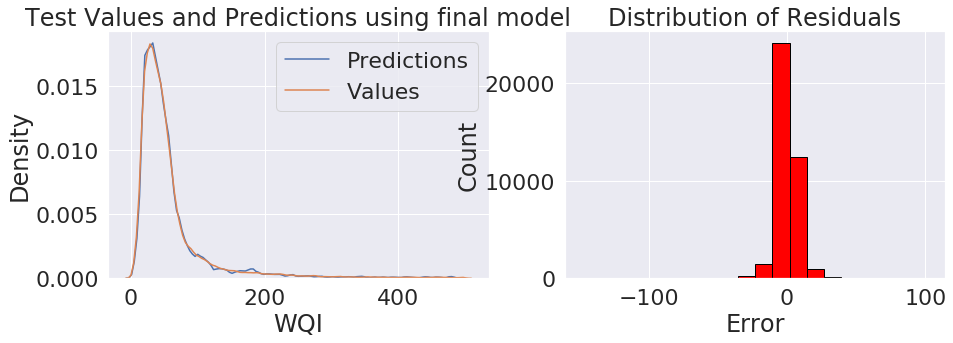

In [69]:
fig=plt.figure()
plt.figure(figsize=(15,10))

# Density plot of the final predictions and the test values
plt.subplot2grid((2,2), (0,0))
sns.kdeplot(knn_final_pred, label = 'Predictions')
sns.kdeplot(y_test, label = 'Values')
# Label the plot
plt.xlabel('WQI'); plt.ylabel('Density');
plt.title('Test Values and Predictions using final model');

# Calculate the residuals
plt.subplot2grid((2,2), (0,1))
final_residuals = knn_final_pred - y_test
# Plot the residuals in a histogram
plt.hist(final_residuals, color = 'red', bins = 20,
         edgecolor = 'black')
plt.xlabel('Error'); plt.ylabel('Count')
plt.title('Distribution of Residuals');

## Recreate Final Model

In [15]:
final_model_chosen=GradientBoostingRegressor(loss="huber", max_depth=10, max_features=None, 
                                            min_samples_leaf=6, min_samples_split=10, 
                                             n_estimators=550, random_state=42)
final_model_chosen.fit(X,y)

GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0, criterion='friedman_mse',
                          init=None, learning_rate=0.1, loss='huber',
                          max_depth=10, max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=6, min_samples_split=10,
                          min_weight_fraction_leaf=0.0, n_estimators=550,
                          n_iter_no_change=None, presort='deprecated',
                          random_state=42, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)

In [18]:
# Make predictions on the test set:
model_pred_chosen=final_model_chosen.predict(X_test)
print("Final Model Performance on the test set: MAE= %0.4f" %mae(y_test, model_pred_chosen))

Final Model Performance on the test set: MAE= 2.7006
